<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/creditloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('loan_data_2007_2014 (1).csv')
pd.set_option('display.max_columns', None)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(466285, 75)

Pada projek ini kita akan membuat prediktif model yang akan memprediksi status loan dari beberapa kriteria peminjam. Disini terdapat 466.285 data baris dan 75 kolom atau kriteria dimana tidak semua kriteria tersebut akan kita gunakan untuk proses pembuatan prediktif model. Yang akan kita lakukan pada tahap selanjutnya adalah proses cleaning data dan feature engineering untuk membuat dataset yang siap untuk dilakukan proses modelling

# Cleaning Data

In [4]:
# Menghapus beberapa kolom yang tidak diperlukan
data.drop(['emp_title','verification_status','issue_d','pymnt_plan','url','title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line',
           'inq_last_6mths','mths_since_last_delinq','policy_code','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc',
           'initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
           'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint',
           'acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
           'open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','all_util','inq_fi'
           ,'total_cu_tl','inq_last_12m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','open_acc_6m','open_il_6m'
           ,'verification_status_joint','annual_inc_joint','annual_inc_joint','id','member_id','desc','Unnamed: 0'],axis=1,inplace=True)

# Feature Engineering
Selanjutnya adalah melakukan feature engineering. Proses ini akan membuat dataset lebih siap untuk proses modelling. Beberapa proses yang akan dilakukan adalah imputasi, deteksi outlier dan penanganan outlier

In [5]:
# Pertama kita deteksi dulu beberapa kolom yang memiliki missing value

data.isna().sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length         21008
home_ownership         0
annual_inc             4
loan_status            0
purpose                0
dtype: int64>

Terdapat 4 missing value pada kolom annual_inc dan 21.008 missin value pada kolom emp_length. Kita coba untuk tidak menghapus data tersebut dengan mengisi missing value pada kolom emp_length dengan nilai modusnya karena kolom tersebut merupakan data object, dan mengisi kolom annual_inc dengan nilai mediannya

In [6]:
mode = data['emp_length'].mode()
mode

0    10+ years
dtype: object

In [7]:
data['emp_length'].fillna(mode, inplace=True)

In [8]:
median = data['annual_inc'].median() #mencari nilai median dari kolom annual_inc
median

63000.0

In [9]:
data['annual_inc'].fillna(median, inplace=True) #mengisi kolom annual_inc dengan nilai mediannya

In [10]:
'''pada kolom term, terdapat campuran antara data numerik dan data nominal dimana 
data tersebut terlihat akan mempengaruhi proses modelling. Maka dari itu kita ambil
data numeriknya saja dari kolom term dan menghapus data nominalnya
'''

new_term = [item.replace(" months", "") for item in data['term']] # membuat kolom baru dari kolom term tanpa kata ' months'
data['new_term'] = new_term # memasukkan kolom baru ke dataframe
data['new_term'] = data['new_term'].astype(int) #mengubah data baru ke dalam bentuk integer

In [11]:
data.drop('term',axis=1,inplace=True) # menghapus kolom term yang sudah diperbarui

In [12]:
data.info() #mengecek tipe data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        466285 non-null  int64  
 1   funded_amnt      466285 non-null  int64  
 2   funded_amnt_inv  466285 non-null  float64
 3   int_rate         466285 non-null  float64
 4   installment      466285 non-null  float64
 5   grade            466285 non-null  object 
 6   sub_grade        466285 non-null  object 
 7   emp_length       445277 non-null  object 
 8   home_ownership   466285 non-null  object 
 9   annual_inc       466285 non-null  float64
 10  loan_status      466285 non-null  object 
 11  purpose          466285 non-null  object 
 12  new_term         466285 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 46.2+ MB


In [16]:
before_grade = data['grade'].value_counts()
before_sub_grade = data['sub_grade'].value_counts()
before_emp_length = data['emp_length'].value_counts()
before_home_ownership = data['home_ownership'].value_counts()
before_loan_status = data['loan_status'].value_counts()
before_purpose = data['purpose'].value_counts()
print('Jumlah grade sebelum encoding: ', before_grade)
print('Jumlah sub_grade sebelum encoding: ', before_sub_grade)
print('Jumlah emp_length sebelum encoding: ', before_emp_length)
print('Jumlah home_ownership sebelum encoding: ', before_home_ownership)
print('Jumlah loan_status sebelum encoding: ', before_loan_status)
print('Jumlah purpose sebelum encoding: ', before_purpose)

Jumlah grade sebelum encoding:  B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
Jumlah sub_grade sebelum encoding:  B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64
Jumlah emp_length sebelum encoding:  10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
Jumlah home_ownership sebelum encoding:  MORTGAGE    235875
RENT        188473
OWN  

Berdasarkan data diatas, masih terdapat 6 kolom yang bertipe object. Untuk menanganinya kita ubah data object menjadi data integer dengan melakukan proses encoding

In [13]:
encoder = LabelEncoder()

In [17]:
data['grade'] = encoder.fit_transform(data['grade'])
data['sub_grade'] = encoder.fit_transform(data['sub_grade'])
data['emp_length'] = encoder.fit_transform(data['emp_length'])
data['home_ownership'] = encoder.fit_transform(data['home_ownership'])
data['loan_status'] = encoder.fit_transform(data['loan_status'])
data['purpose'] = encoder.fit_transform(data['purpose'])

In [100]:
setelah_grade = data['grade'].value_counts()
setelah_sub_grade = data['sub_grade'].value_counts()
setelah_emp_length = data['emp_length'].value_counts()
setelah_home_ownership = data['home_ownership'].value_counts()
setelah_loan_status = data['loan_status'].value_counts()
setelah_purpose = data['purpose'].value_counts()
print('Jumlah grade setelah encoding: ', setelah_grade)
print('Jumlah sub_grade setelah encoding: ', setelah_sub_grade)
print('Jumlah emp_length setelah encoding: ', setelah_emp_length)
print('Jumlah home_ownership setelah encoding: ', setelah_home_ownership)
print('Jumlah loan_status setelah encoding: ', setelah_loan_status)
print('Jumlah purpose setelah encoding: ', setelah_purpose)

Jumlah grade setelah encoding:  1    136929
2    125293
3     76888
0     74867
4     35757
5     13229
6      3322
Name: grade, dtype: int64
Jumlah sub_grade setelah encoding:  7     31686
8     30505
10    26953
11    26740
6     26610
12    25317
9     25252
13    24105
5     22876
14    22178
4     21757
15    19261
3     19045
16    17046
17    14916
18    14099
2     12568
19    11566
1     10956
0     10541
20     9033
21     8669
22     6976
23     5992
24     5087
25     3940
26     3001
27     2708
28     2067
29     1513
30     1109
31      823
32      583
33      422
34      385
Name: sub_grade, dtype: int64
Jumlah emp_length setelah encoding:  1     150049
2      41373
3      36596
10     36265
5      30774
0      29622
4      28023
7      26180
6      26112
8      22395
11     21008
9      17888
Name: emp_length, dtype: int64
Jumlah home_ownership setelah encoding:  1    235875
5    188473
4     41704
3       182
2        50
0         1
Name: home_ownership, dtype: int64


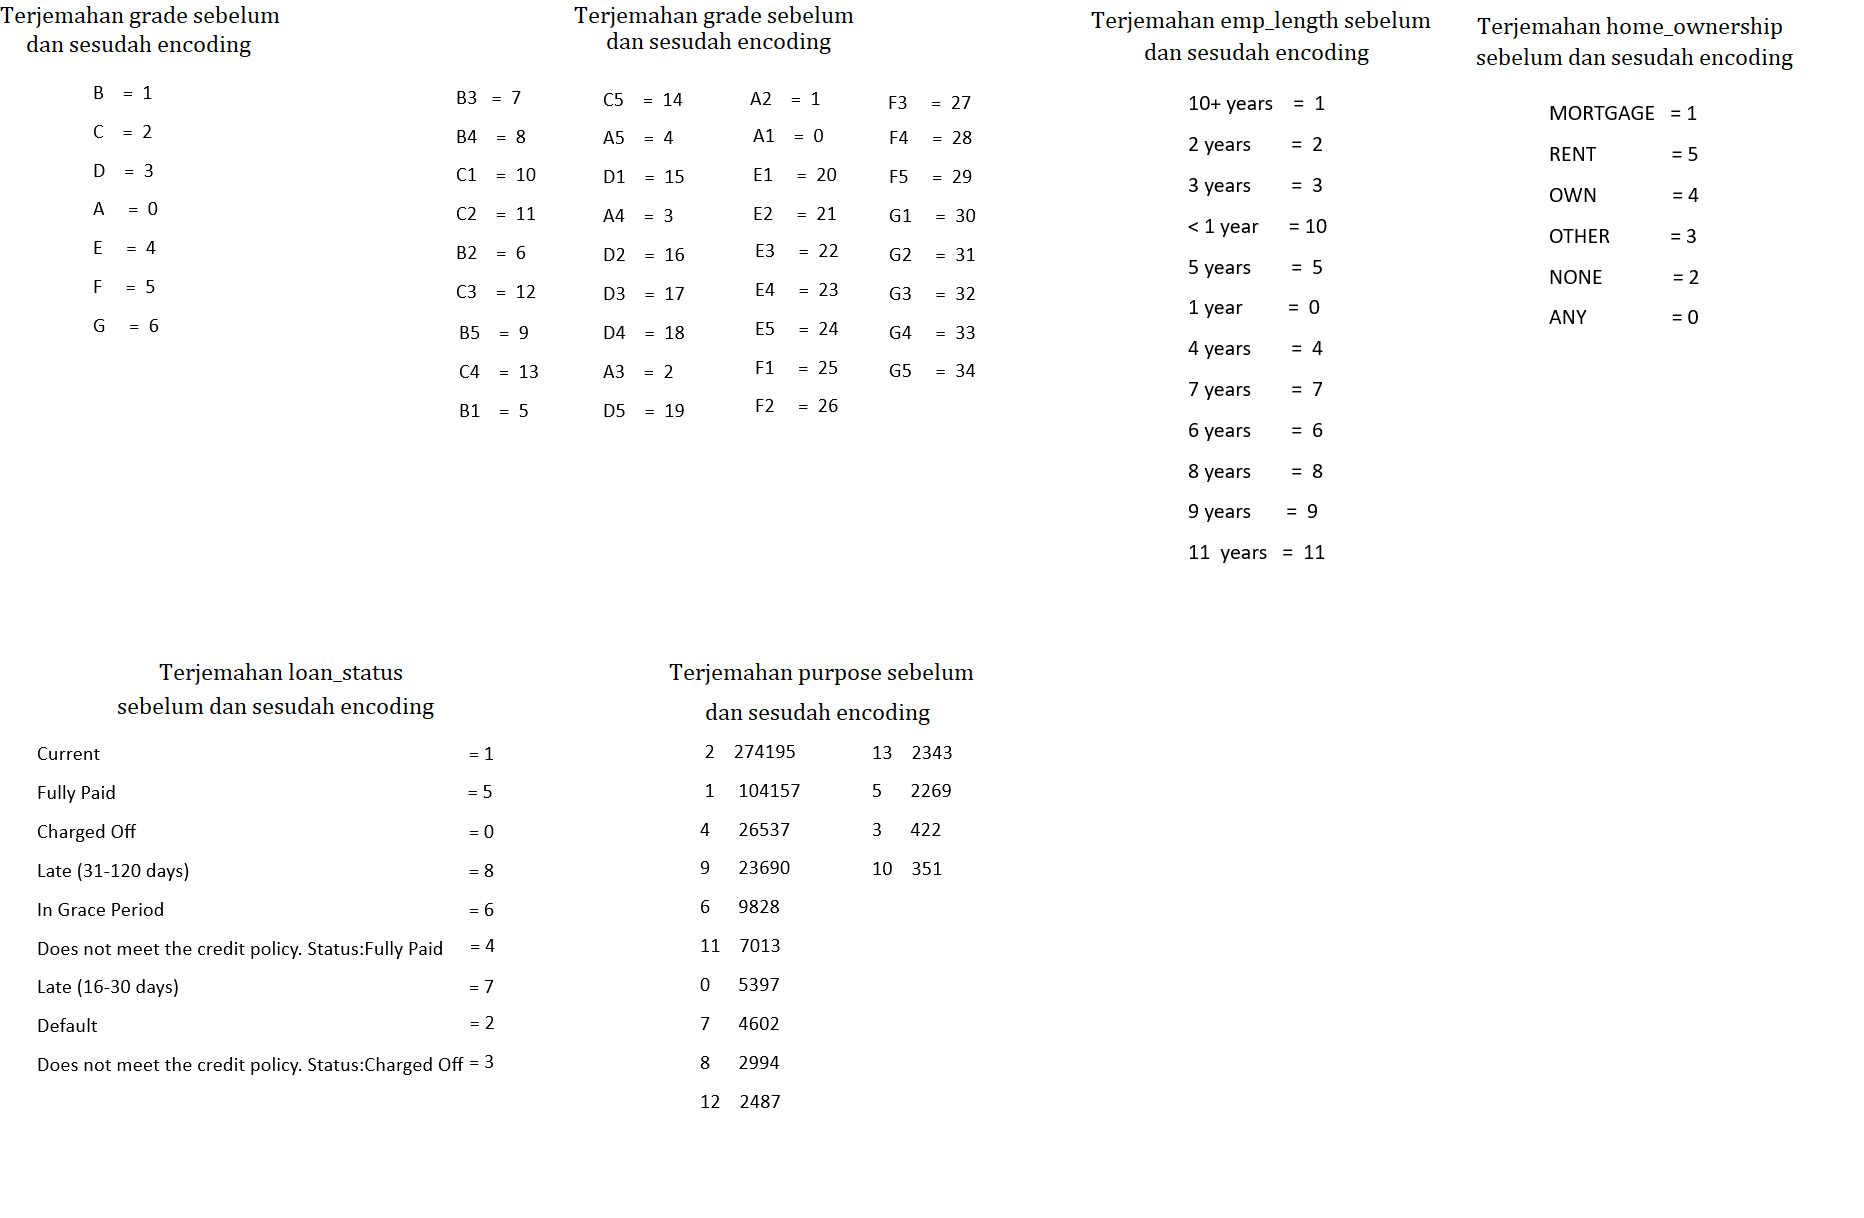

In [19]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        466285 non-null  int64  
 1   funded_amnt      466285 non-null  int64  
 2   funded_amnt_inv  466285 non-null  float64
 3   int_rate         466285 non-null  float64
 4   installment      466285 non-null  float64
 5   grade            466285 non-null  int64  
 6   sub_grade        466285 non-null  int64  
 7   emp_length       466285 non-null  int64  
 8   home_ownership   466285 non-null  int64  
 9   annual_inc       466285 non-null  float64
 10  loan_status      466285 non-null  int64  
 11  purpose          466285 non-null  int64  
 12  new_term         466285 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 46.2 MB


Semua data sudah berbentuk integer atau float yang bisa dilakukan proses permodelan

Selanjutnya mengecek outlier dengan membuat boxplot dari tiap kolom kecuali kolom yang di encoding

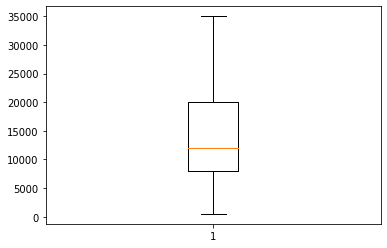

In [20]:
plt.boxplot(data['loan_amnt'])
plt.show()

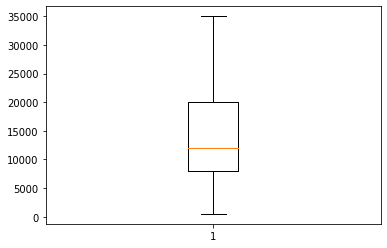

In [21]:
plt.boxplot(data['funded_amnt'])
plt.show()

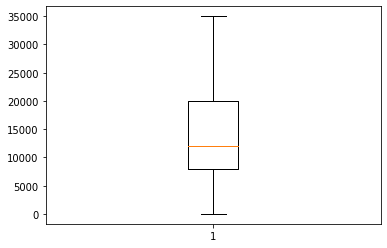

In [22]:
plt.boxplot(data['funded_amnt_inv'])
plt.show()

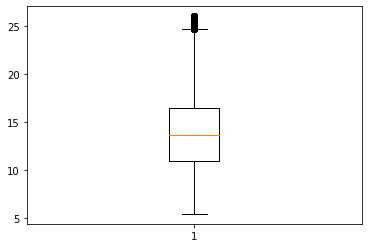

In [23]:
plt.boxplot(data['int_rate'])
plt.show()

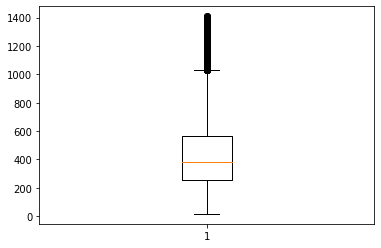

In [24]:
plt.boxplot(data['installment'])
plt.show()

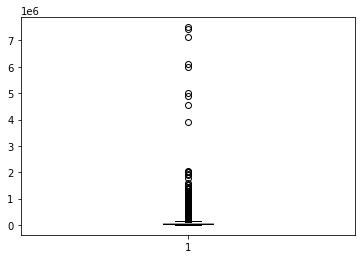

In [25]:
plt.boxplot(data['annual_inc'])
plt.show()

Berdasarkan grafik diatas, pada kolom int_rate, installment dan annual_inc terdapat adanya outlier. Pertama kita analisis jumlah outlier dari ketiga kolom dengan menggunakan analisis univariate

In [26]:
# Kita lihat analisis statistik dari seluruh kolom

data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,1.817095,11.064971,4.036945,2.886007,7.327729e+04,2.664512,2.660617,42.605334
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,1.320385,6.529895,3.446017,1.927907,5.496334e+04,2.166583,2.412059,10.719040
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,0.000000,0.000000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,1.000000,6.000000,1.000000,1.000000,4.500000e+04,1.000000,2.000000,36.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,2.000000,10.000000,3.000000,1.000000,6.300000e+04,1.000000,2.000000,36.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,3.000000,15.000000,7.000000,5.000000,8.895300e+04,5.000000,2.000000,60.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,6.000000,34.000000,11.000000,5.000000,7.500000e+06,8.000000,13.000000,60.000000


Pertama kita menangani nilai outlier pada kolom int_rate berdasarkan data di atas

## int_rate

In [27]:
Q1_intrate = 10.99
Q3_intrate = 16.49

IQR = Q3_intrate - Q1_intrate
min_IQR_int_rate = Q1_intrate - 1.5 * IQR
max_IQR_int_rate = Q3_intrate + 1.5 * IQR

print('IQR minimum int_rate = ', min_IQR_int_rate)
print('IQR maksimum int_rate = ', max_IQR_int_rate)

IQR minimum int_rate =  2.7400000000000038
IQR maksimum int_rate =  24.739999999999995


In [28]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom int_rate
data.loc[data['int_rate']>max_IQR_int_rate]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
42655,19425,19425,19425.0,25.89,580.33,6,32,5,5,55000.0,0,2,60
42739,35000,35000,34975.0,25.80,1406.45,6,30,10,5,180000.0,5,11,36
42783,1750,1750,1750.0,24.99,69.58,5,28,4,5,29000.0,5,2,36
42800,19600,19600,19600.0,25.57,581.86,5,29,5,1,139500.0,5,2,60
42853,35000,35000,35000.0,26.06,1049.17,6,34,1,1,135000.0,5,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466002,19600,19600,19600.0,25.83,584.87,6,31,8,5,75800.0,8,2,60
466022,8000,8000,7975.0,25.89,239.01,6,32,5,5,47000.0,5,2,60
466141,30000,30000,29825.0,25.57,890.60,5,29,1,1,86000.0,5,2,60
466223,24000,24000,23925.0,25.83,716.16,6,31,1,1,60000.0,5,7,60


Terdapat cukup banyak outlier pada kolom int_rate yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [29]:
# Pertama mengambil data outlier
with_int_rate = data.loc[data['int_rate']>max_IQR_int_rate]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR, namun kita bulatkan menjadi 2 angka di belakang koma yaitu 24.74

In [30]:
with_int_rate['new_int_rate'] = 24.74
with_int_rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,new_int_rate
42655,19425,19425,19425.0,25.89,580.33,6,32,5,5,55000.0,0,2,60,24.74
42739,35000,35000,34975.0,25.80,1406.45,6,30,10,5,180000.0,5,11,36,24.74
42783,1750,1750,1750.0,24.99,69.58,5,28,4,5,29000.0,5,2,36,24.74
42800,19600,19600,19600.0,25.57,581.86,5,29,5,1,139500.0,5,2,60,24.74
42853,35000,35000,35000.0,26.06,1049.17,6,34,1,1,135000.0,5,2,60,24.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466002,19600,19600,19600.0,25.83,584.87,6,31,8,5,75800.0,8,2,60,24.74
466022,8000,8000,7975.0,25.89,239.01,6,32,5,5,47000.0,5,2,60,24.74
466141,30000,30000,29825.0,25.57,890.60,5,29,1,1,86000.0,5,2,60,24.74
466223,24000,24000,23925.0,25.83,716.16,6,31,1,1,60000.0,5,7,60,24.74


In [31]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai int_rate baru
new_with_int_rate = with_int_rate[['loan_amnt','funded_amnt','funded_amnt_inv','new_int_rate','installment',
                                  'grade','sub_grade','emp_length','home_ownership','annual_inc','loan_status','purpose','new_term']]
new_with_int_rate

,loan_amnt,funded_amnt,funded_amnt_inv,new_int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
42655,19425,19425,19425.0,24.74,580.33,6,32,5,5,55000.0,0,2,60
42739,35000,35000,34975.0,24.74,1406.45,6,30,10,5,180000.0,5,11,36
42783,1750,1750,1750.0,24.74,69.58,5,28,4,5,29000.0,5,2,36
42800,19600,19600,19600.0,24.74,581.86,5,29,5,1,139500.0,5,2,60
42853,35000,35000,35000.0,24.74,1049.17,6,34,1,1,135000.0,5,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466002,19600,19600,19600.0,24.74,584.87,6,31,8,5,75800.0,8,2,60
466022,8000,8000,7975.0,24.74,239.01,6,32,5,5,47000.0,5,2,60
466141,30000,30000,29825.0,24.74,890.60,5,29,1,1,86000.0,5,2,60
466223,24000,24000,23925.0,24.74,716.16,6,31,1,1,60000.0,5,7,60


In [32]:
# Lalu mengganti nama new_int_rate dengan int_rate kembali
new_with_int_rate.rename(columns={'new_int_rate': 'int_rate'}, inplace=True)
new_with_int_rate

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
42655,19425,19425,19425.0,24.74,580.33,6,32,5,5,55000.0,0,2,60
42739,35000,35000,34975.0,24.74,1406.45,6,30,10,5,180000.0,5,11,36
42783,1750,1750,1750.0,24.74,69.58,5,28,4,5,29000.0,5,2,36
42800,19600,19600,19600.0,24.74,581.86,5,29,5,1,139500.0,5,2,60
42853,35000,35000,35000.0,24.74,1049.17,6,34,1,1,135000.0,5,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466002,19600,19600,19600.0,24.74,584.87,6,31,8,5,75800.0,8,2,60
466022,8000,8000,7975.0,24.74,239.01,6,32,5,5,47000.0,5,2,60
466141,30000,30000,29825.0,24.74,890.60,5,29,1,1,86000.0,5,2,60
466223,24000,24000,23925.0,24.74,716.16,6,31,1,1,60000.0,5,7,60


In [33]:
#Lalu kita menghapus data awal yang nilai int_rate nya >= nilai max IQR
without_int_rate = data.drop(data[data['int_rate'] >= max_IQR_int_rate].index)
without_int_rate

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,5000,5000,4975.0,10.65,162.87,1,6,1,5,24000.0,5,1,36
1,2500,2500,2500.0,15.27,59.83,2,13,10,5,30000.0,0,0,60
2,2400,2400,2400.0,15.96,84.33,2,14,1,5,12252.0,5,11,36
3,10000,10000,10000.0,13.49,339.31,2,10,1,5,49200.0,5,9,36
4,3000,3000,3000.0,12.69,67.79,1,9,0,5,80000.0,1,9,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.50,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.34,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.59,0,3,3,4,83000.0,5,1,36


In [34]:
#lalu menggabungkan kedua data di atas menjadi data2
data2 = pd.concat([new_with_int_rate, without_int_rate], axis = 0).reset_index(drop=True)
data2

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,19425,19425,19425.0,24.74,580.33,6,32,5,5,55000.0,0,2,60
1,35000,35000,34975.0,24.74,1406.45,6,30,10,5,180000.0,5,11,36
2,1750,1750,1750.0,24.74,69.58,5,28,4,5,29000.0,5,2,36
3,19600,19600,19600.0,24.74,581.86,5,29,5,1,139500.0,5,2,60
4,35000,35000,35000.0,24.74,1049.17,6,34,1,1,135000.0,5,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.50,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.34,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.59,0,3,3,4,83000.0,5,1,36


Selanjutnya kita melakukan hal yang sama ke kolom installment

## installment

In [35]:
data2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.821315,432.061201,1.817095,11.064971,4.036945,2.886007,7.327729e+04,2.664512,2.660617,42.605334
std,8286.509164,8274.371300,8297.637788,4.336803,243.485550,1.320385,6.529895,3.446017,1.927907,5.496334e+04,2.166583,2.412059,10.719040
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,0.000000,0.000000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,1.000000,6.000000,1.000000,1.000000,4.500000e+04,1.000000,2.000000,36.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,2.000000,10.000000,3.000000,1.000000,6.300000e+04,1.000000,2.000000,36.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,3.000000,15.000000,7.000000,5.000000,8.895300e+04,5.000000,2.000000,60.000000
max,35000.000000,35000.000000,35000.000000,24.740000,1409.990000,6.000000,34.000000,11.000000,5.000000,7.500000e+06,8.000000,13.000000,60.000000


In [36]:
Q1_installment = 256.69
Q3_installment = 566.58

IQR_installment = Q3_installment - Q1_installment
min_IQR_installment = Q1_installment - 1.5 * IQR_installment
max_IQR_installment = Q3_installment + 1.5 * IQR_installment

print('IQR minimum installment = ', min_IQR_installment)
print('IQR maksimum installment = ', max_IQR_installment)

IQR minimum installment =  -208.14500000000004
IQR maksimum installment =  1031.415


In [37]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom installment
data2.loc[data2['installment']>max_IQR_installment]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
1,35000,35000,34975.0,24.74,1406.45,6,30,10,5,180000.0,5,11,36
4,35000,35000,35000.0,24.74,1049.17,6,34,1,1,135000.0,5,2,60
9,35000,35000,34975.0,24.74,1044.40,6,31,3,1,450000.0,5,11,60
24,35000,35000,35000.0,24.74,1045.64,6,32,0,5,750000.0,1,7,60
35,26375,26375,26375.0,24.74,1048.53,5,28,1,4,70000.0,0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466216,35000,35000,35000.0,16.99,1247.68,3,15,1,1,84000.0,0,2,36
466227,35000,35000,34975.0,11.99,1162.34,1,7,1,1,180000.0,5,2,36
466240,32350,32350,32350.0,16.99,1153.21,3,15,2,1,72500.0,5,2,36
466242,30000,30000,30000.0,15.61,1048.95,2,13,1,1,80000.0,1,1,36


Terdapat cukup banyak outlier yaitu 11.711 baris pada kolom installment yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [38]:
# Pertama mengambil data outlier
with_installment = data2.loc[data2['installment']>max_IQR_installment]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR

In [39]:
with_installment['new_installment'] = 1031.415
with_installment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,new_installment
1,35000,35000,34975.0,24.74,1406.45,6,30,10,5,180000.0,5,11,36,1031.415
4,35000,35000,35000.0,24.74,1049.17,6,34,1,1,135000.0,5,2,60,1031.415
9,35000,35000,34975.0,24.74,1044.40,6,31,3,1,450000.0,5,11,60,1031.415
24,35000,35000,35000.0,24.74,1045.64,6,32,0,5,750000.0,1,7,60,1031.415
35,26375,26375,26375.0,24.74,1048.53,5,28,1,4,70000.0,0,2,36,1031.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466216,35000,35000,35000.0,16.99,1247.68,3,15,1,1,84000.0,0,2,36,1031.415
466227,35000,35000,34975.0,11.99,1162.34,1,7,1,1,180000.0,5,2,36,1031.415
466240,32350,32350,32350.0,16.99,1153.21,3,15,2,1,72500.0,5,2,36,1031.415
466242,30000,30000,30000.0,15.61,1048.95,2,13,1,1,80000.0,1,1,36,1031.415


In [40]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai installment baru
new_with_installment = with_installment[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','new_installment',
                                    'grade','sub_grade','emp_length','home_ownership','annual_inc','loan_status','purpose','new_term']]
new_with_installment

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,new_installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
1,35000,35000,34975.0,24.74,1031.415,6,30,10,5,180000.0,5,11,36
4,35000,35000,35000.0,24.74,1031.415,6,34,1,1,135000.0,5,2,60
9,35000,35000,34975.0,24.74,1031.415,6,31,3,1,450000.0,5,11,60
24,35000,35000,35000.0,24.74,1031.415,6,32,0,5,750000.0,1,7,60
35,26375,26375,26375.0,24.74,1031.415,5,28,1,4,70000.0,0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466216,35000,35000,35000.0,16.99,1031.415,3,15,1,1,84000.0,0,2,36
466227,35000,35000,34975.0,11.99,1031.415,1,7,1,1,180000.0,5,2,36
466240,32350,32350,32350.0,16.99,1031.415,3,15,2,1,72500.0,5,2,36
466242,30000,30000,30000.0,15.61,1031.415,2,13,1,1,80000.0,1,1,36


In [41]:
# Lalu mengganti nama new_installment dengan installment kembali
new_with_installment.rename(columns={'new_installment': 'installment'}, inplace=True)
new_with_installment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
1,35000,35000,34975.0,24.74,1031.415,6,30,10,5,180000.0,5,11,36
4,35000,35000,35000.0,24.74,1031.415,6,34,1,1,135000.0,5,2,60
9,35000,35000,34975.0,24.74,1031.415,6,31,3,1,450000.0,5,11,60
24,35000,35000,35000.0,24.74,1031.415,6,32,0,5,750000.0,1,7,60
35,26375,26375,26375.0,24.74,1031.415,5,28,1,4,70000.0,0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466216,35000,35000,35000.0,16.99,1031.415,3,15,1,1,84000.0,0,2,36
466227,35000,35000,34975.0,11.99,1031.415,1,7,1,1,180000.0,5,2,36
466240,32350,32350,32350.0,16.99,1031.415,3,15,2,1,72500.0,5,2,36
466242,30000,30000,30000.0,15.61,1031.415,2,13,1,1,80000.0,1,1,36


In [42]:
#Lalu kita menghapus data awal yang nilai installment nya >= nilai max IQR
without_installment = data2.drop(data2[data2['installment'] >= max_IQR_installment].index)
without_installment

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,19425,19425,19425.0,24.74,580.33,6,32,5,5,55000.0,0,2,60
2,1750,1750,1750.0,24.74,69.58,5,28,4,5,29000.0,5,2,36
3,19600,19600,19600.0,24.74,581.86,5,29,5,1,139500.0,5,2,60
5,21200,21200,21200.0,24.74,634.62,6,33,3,1,93000.0,5,2,60
6,10000,10000,10000.0,24.74,293.46,5,28,6,5,35000.0,5,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.50,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.34,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.59,0,3,3,4,83000.0,5,1,36


In [43]:
#lalu menggabungkan kedua data di atas menjadi data3
data3 = pd.concat([new_with_installment, without_installment], axis = 0).reset_index(drop=True)
data3

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,180000.0,5,11,36
1,35000,35000,35000.0,24.74,1031.415,6,34,1,1,135000.0,5,2,60
2,35000,35000,34975.0,24.74,1031.415,6,31,3,1,450000.0,5,11,60
3,35000,35000,35000.0,24.74,1031.415,6,32,0,5,750000.0,1,7,60
4,26375,26375,26375.0,24.74,1031.415,5,28,1,4,70000.0,0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.640,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.500,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.340,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.590,0,3,3,4,83000.0,5,1,36


Selanjutnya kita melakukan hal yang sama ke kolom annual_inc

## iannual_inc

In [44]:
data3.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.821315,428.730404,1.817095,11.064971,4.036945,2.886007,7.327729e+04,2.664512,2.660617,42.605334
std,8286.509164,8274.371300,8297.637788,4.336803,233.850469,1.320385,6.529895,3.446017,1.927907,5.496334e+04,2.166583,2.412059,10.719040
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,0.000000,0.000000,0.000000,1.896000e+03,0.000000,0.000000,36.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,1.000000,6.000000,1.000000,1.000000,4.500000e+04,1.000000,2.000000,36.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,2.000000,10.000000,3.000000,1.000000,6.300000e+04,1.000000,2.000000,36.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,3.000000,15.000000,7.000000,5.000000,8.895300e+04,5.000000,2.000000,60.000000
max,35000.000000,35000.000000,35000.000000,24.740000,1031.415000,6.000000,34.000000,11.000000,5.000000,7.500000e+06,8.000000,13.000000,60.000000


In [45]:
Q1_annual_inc = 45000
Q3_annual_inc = 88953

IQR_annual_inc = Q3_annual_inc - Q1_annual_inc
min_IQR_annual_inc = Q1_annual_inc - 1.5 * IQR_annual_inc
max_IQR_annual_inc = Q3_annual_inc + 1.5 * IQR_annual_inc

print('IQR minimum annual_inc = ', min_IQR_annual_inc)
print('IQR maksimum annual_inc = ', max_IQR_annual_inc)

IQR minimum annual_inc =  -20929.5
IQR maksimum annual_inc =  154882.5


In [46]:
# Berdasarkan boxplot hanya terdapat high outlier. Maka kita akan mencari data high outlier dari kolom installment
data3.loc[data3['annual_inc']>max_IQR_annual_inc]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,180000.0,5,11,36
2,35000,35000,34975.0,24.74,1031.415,6,31,3,1,450000.0,5,11,60
3,35000,35000,35000.0,24.74,1031.415,6,32,0,5,750000.0,1,7,60
8,35000,35000,35000.0,24.74,1031.415,6,31,6,1,195000.0,1,2,60
11,35000,35000,35000.0,24.74,1031.415,5,29,1,4,159600.0,1,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466211,24375,24375,24375.0,21.48,924.350,4,21,8,1,300000.0,5,2,36
466221,24000,24000,24000.0,14.47,564.310,2,11,1,1,200000.0,5,1,60
466233,30000,30000,29975.0,7.90,938.710,0,3,1,1,225000.0,1,1,36
466238,20000,20000,20000.0,7.90,625.810,0,3,1,1,250000.0,1,1,36


Terdapat cukup banyak outlier yaitu 19.899 baris pada kolom annual_inc yang tidak mungkin kita hilangkan, maka kita akan mengisinya dengan nilai maksimum IQR dari kolom tersebut

In [47]:
# Pertama mengambil data outlier
with_annual_inc = data3.loc[data3['annual_inc']>max_IQR_annual_inc]

Selanjutnya kita membuat kolom baru yang berisi nilai maksimum IQR

In [48]:
with_annual_inc['new_annual_inc'] = 154882.5
with_annual_inc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term,new_annual_inc
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,180000.0,5,11,36,154882.5
2,35000,35000,34975.0,24.74,1031.415,6,31,3,1,450000.0,5,11,60,154882.5
3,35000,35000,35000.0,24.74,1031.415,6,32,0,5,750000.0,1,7,60,154882.5
8,35000,35000,35000.0,24.74,1031.415,6,31,6,1,195000.0,1,2,60,154882.5
11,35000,35000,35000.0,24.74,1031.415,5,29,1,4,159600.0,1,2,60,154882.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466211,24375,24375,24375.0,21.48,924.350,4,21,8,1,300000.0,5,2,36,154882.5
466221,24000,24000,24000.0,14.47,564.310,2,11,1,1,200000.0,5,1,60,154882.5
466233,30000,30000,29975.0,7.90,938.710,0,3,1,1,225000.0,1,1,36,154882.5
466238,20000,20000,20000.0,7.90,625.810,0,3,1,1,250000.0,1,1,36,154882.5


In [49]:
# Selanjutnya membuat urutan kolom seperti kolom pada data awal berdasarkan nilai annual_inc baru
new_with_annual_inc = with_annual_inc[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                                    'grade','sub_grade','emp_length','home_ownership','new_annual_inc','loan_status','purpose','new_term']]
new_with_annual_inc

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,new_annual_inc,loan_status,purpose,new_term
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,154882.5,5,11,36
2,35000,35000,34975.0,24.74,1031.415,6,31,3,1,154882.5,5,11,60
3,35000,35000,35000.0,24.74,1031.415,6,32,0,5,154882.5,1,7,60
8,35000,35000,35000.0,24.74,1031.415,6,31,6,1,154882.5,1,2,60
11,35000,35000,35000.0,24.74,1031.415,5,29,1,4,154882.5,1,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466211,24375,24375,24375.0,21.48,924.350,4,21,8,1,154882.5,5,2,36
466221,24000,24000,24000.0,14.47,564.310,2,11,1,1,154882.5,5,1,60
466233,30000,30000,29975.0,7.90,938.710,0,3,1,1,154882.5,1,1,36
466238,20000,20000,20000.0,7.90,625.810,0,3,1,1,154882.5,1,1,36


In [50]:
# Lalu mengganti nama with_annual_inc dengan annual_inc kembali
new_with_annual_inc.rename(columns={'new_annual_inc': 'annual_inc'}, inplace=True)
new_with_annual_inc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,154882.5,5,11,36
2,35000,35000,34975.0,24.74,1031.415,6,31,3,1,154882.5,5,11,60
3,35000,35000,35000.0,24.74,1031.415,6,32,0,5,154882.5,1,7,60
8,35000,35000,35000.0,24.74,1031.415,6,31,6,1,154882.5,1,2,60
11,35000,35000,35000.0,24.74,1031.415,5,29,1,4,154882.5,1,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466211,24375,24375,24375.0,21.48,924.350,4,21,8,1,154882.5,5,2,36
466221,24000,24000,24000.0,14.47,564.310,2,11,1,1,154882.5,5,1,60
466233,30000,30000,29975.0,7.90,938.710,0,3,1,1,154882.5,1,1,36
466238,20000,20000,20000.0,7.90,625.810,0,3,1,1,154882.5,1,1,36


In [51]:
#Lalu kita menghapus data awal yang nilai annual_inc nya >= nilai max IQR
without_annual_inc = data3.drop(data3[data3['annual_inc'] >= max_IQR_annual_inc].index)
without_annual_inc

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
1,35000,35000,35000.0,24.74,1031.415,6,34,1,1,135000.0,5,2,60
4,26375,26375,26375.0,24.74,1031.415,5,28,1,4,70000.0,0,2,36
5,35000,35000,34850.0,24.74,1031.415,6,30,2,1,135000.0,1,7,60
6,35000,35000,34775.0,24.74,1031.415,6,34,11,1,132000.0,1,7,60
7,35000,35000,35000.0,24.74,1031.415,6,31,1,4,85468.0,5,5,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.640,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.500,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.340,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.590,0,3,3,4,83000.0,5,1,36


In [52]:
#lalu menggabungkan kedua data di atas menjadi data4
data4 = pd.concat([new_with_annual_inc, without_annual_inc], axis = 0).reset_index(drop=True)
data4

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,new_term
0,35000,35000,34975.0,24.74,1031.415,6,30,10,5,154882.5,5,11,36
1,35000,35000,34975.0,24.74,1031.415,6,31,3,1,154882.5,5,11,60
2,35000,35000,35000.0,24.74,1031.415,6,32,0,5,154882.5,1,7,60
3,35000,35000,35000.0,24.74,1031.415,6,31,6,1,154882.5,1,2,60
4,35000,35000,35000.0,24.74,1031.415,5,29,1,4,154882.5,1,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.640,2,11,4,1,110000.0,1,2,60
466281,22000,22000,22000.0,19.97,582.500,3,19,1,1,78000.0,0,2,60
466282,20700,20700,20700.0,16.99,514.340,3,15,7,1,46000.0,1,2,60
466283,2000,2000,2000.0,7.90,62.590,0,3,3,4,83000.0,5,1,36


## Selanjutnya kita melihat hubungan antar varibel pada dataset dengan membuat grafik heatmap

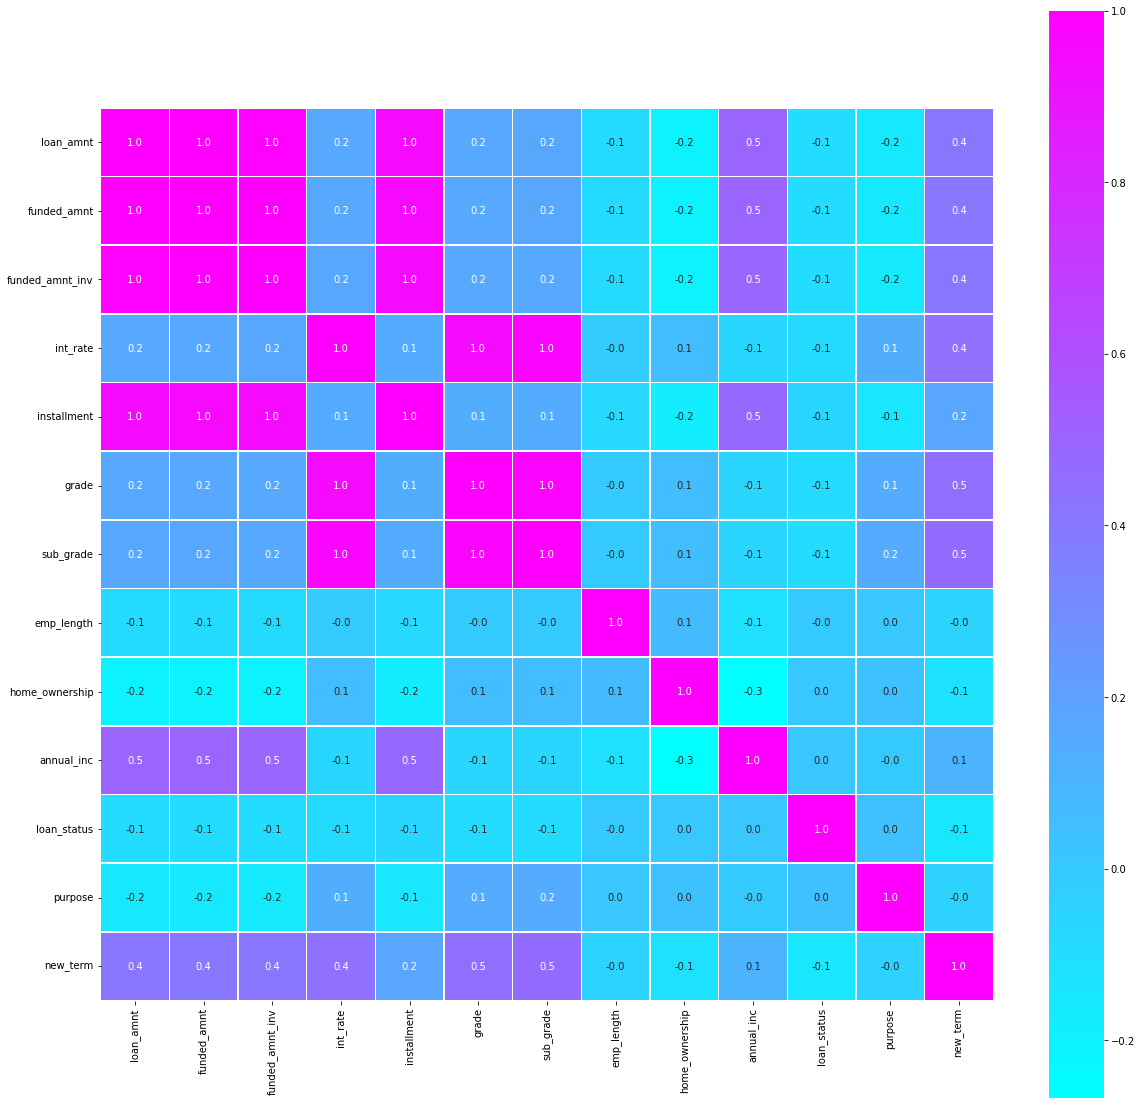

In [53]:
corr = data4.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="cool", linewidths=.5, ax=ax);

Pada dataset ini, yang merupakan variabel dependen adalah loan_status dan selain itu merupakan independent variabel. Berdasarkan heatmap di atas, keterkaitan antara variabel independent dan variabel dependent tidak terlalu besar yang ditandai dengan nilai korelasi yang tidak terlalu tinggi

# Modelling
Selanjutnya adalah tahap modelling. Disini kita akan menggunakan beberapa model yaitu logistic regresssion, SVM, decision tree, random forest, KNN dan naive bayes. Disini juga dilakukan proses cross validation untuk menambah variasi permodelan

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [84]:
X = data4.drop('loan_status',axis=1)
y = data4['loan_status']

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [86]:
print(f"Train features: {X_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Validation features: {X_val.shape}")
print(f"Validation target: {y_val.shape}")
print(f"Test features: {X_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (279771, 12)
Train target: (279771,)
Validation features: (93257, 12)
Validation target: (93257,)
Test features: (93257, 12)
Test target: (93257,)


In [87]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_train, y_train)*100,2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50.44

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_train, y_train)*100,2)
acc_knn

64.07

In [89]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_val)
acc_nb = round(nb.score(X_train, y_train)*100,2)
acc_nb

47.59

In [90]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_val)
acc_dtree = round(dtree.score(X_train, y_train)*100,2)
acc_dtree

99.34

In [91]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_val)
acc_rforest = round(rforest.score(X_train, y_train)*100,2)
acc_rforest

99.34

In [92]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
acc_dtree_test = round(dtree.score(X_train, y_train)*100,2)
acc_dtree_test

99.34

In [93]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
acc_rforest_2 = round(rforest.score(X_train, y_train)*100,2)
acc_rforest_2

99.34

In [96]:
X_test['loan_status'] = rforest_pred
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
376341,28000,28000,28000.0,7.12,866.100,0,2,1,1,120000.0,2,36,5
24026,35000,35000,35000.0,7.49,1031.415,0,3,10,5,125000.0,1,36,1
237852,25500,25500,25500.0,7.62,794.620,0,2,0,1,84000.0,2,36,5
343741,12000,12000,12000.0,12.49,401.390,1,9,2,5,52000.0,2,36,1
91745,4300,4300,4300.0,22.40,165.120,4,22,2,1,35500.0,2,36,1


In [99]:
hasil = pd.DataFrame(X_test)
hasil

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
376341,28000,28000,28000.0,7.12,866.100,0,2,1,1,120000.0,2,36,5
24026,35000,35000,35000.0,7.49,1031.415,0,3,10,5,125000.0,1,36,1
237852,25500,25500,25500.0,7.62,794.620,0,2,0,1,84000.0,2,36,5
343741,12000,12000,12000.0,12.49,401.390,1,9,2,5,52000.0,2,36,1
91745,4300,4300,4300.0,22.40,165.120,4,22,2,1,35500.0,2,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287449,13600,13600,13600.0,14.99,471.390,2,14,2,1,57000.0,4,36,5
50411,14000,14000,13700.0,7.29,434.140,0,3,1,1,86500.0,2,36,5
222290,21000,21000,20975.0,10.16,679.190,1,5,1,1,94000.0,2,36,5
273486,30000,30000,30000.0,17.86,759.520,3,19,1,1,65000.0,4,60,1


Selanjutnya adalah analisis dari hasil prediksi berdasakan tiap kriteria dalam kolom loan status. Analisis menggunakan teknik visualisasi yang akan menggambarkan persebaran jumlah variabel independent terhapap tiap kriteria pada loan_status

#  Fully paid & Doesn't meet credit policy. Status : fully paid


In [141]:
# Kita coba menganalisis data orang dengan status pinjaman fully paid dan Doesn't meet credit policy. Status : fully paid
fully_paid_ = hasil[(hasil['loan_status']==5) | (hasil['loan_status']==4)]
fully_paid_

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
376341,28000,28000,28000.0,7.12,866.10,0,2,1,1,120000.0,2,36,5
237852,25500,25500,25500.0,7.62,794.62,0,2,0,1,84000.0,2,36,5
104102,18775,18775,18775.0,6.97,579.47,0,1,1,1,70000.0,2,36,5
182633,9000,9000,9000.0,16.29,317.71,2,13,6,1,69000.0,1,36,5
445723,12000,12000,11875.0,11.99,398.52,1,7,2,5,64000.0,6,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219643,11000,11000,11000.0,18.49,400.39,3,16,6,5,39000.0,2,36,5
287449,13600,13600,13600.0,14.99,471.39,2,14,2,1,57000.0,4,36,5
50411,14000,14000,13700.0,7.29,434.14,0,3,1,1,86500.0,2,36,5
222290,21000,21000,20975.0,10.16,679.19,1,5,1,1,94000.0,2,36,5


In [142]:
df_cat = fully_paid_[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


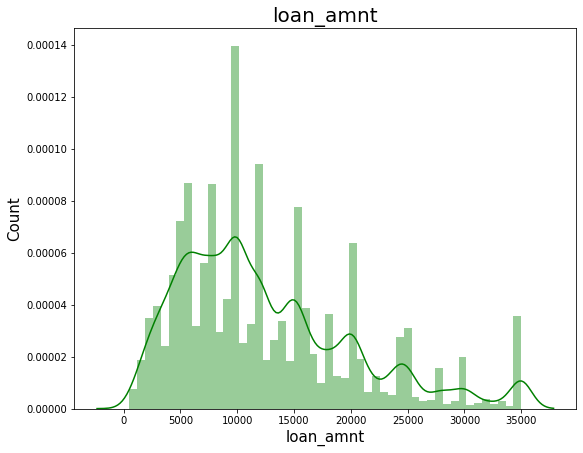

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


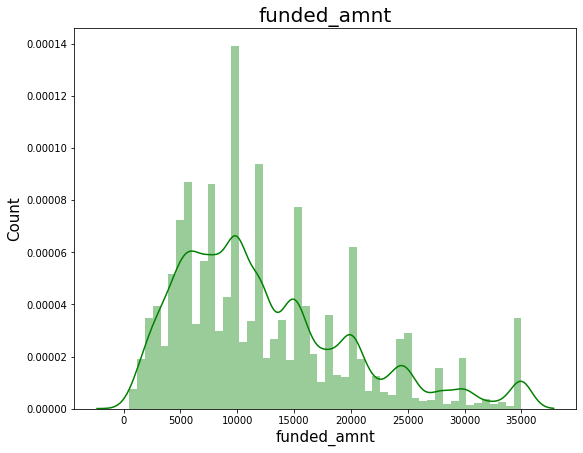

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


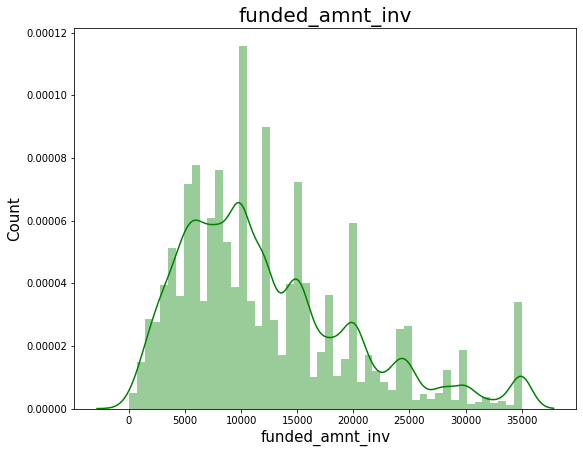

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


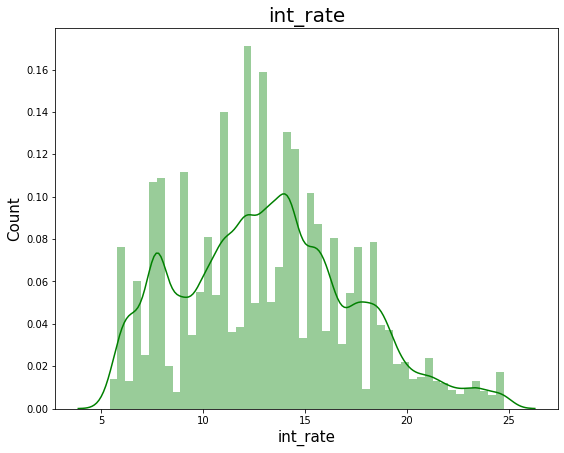

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


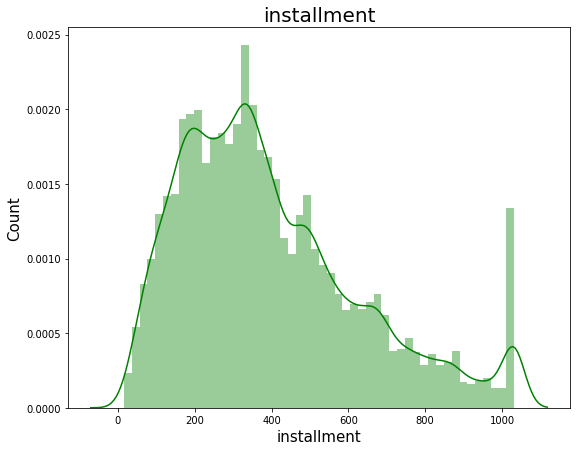

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


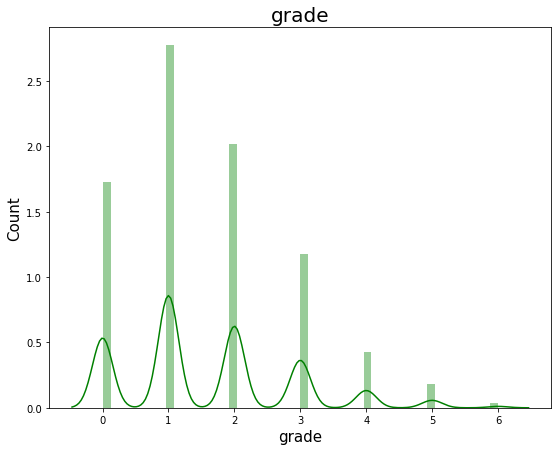

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


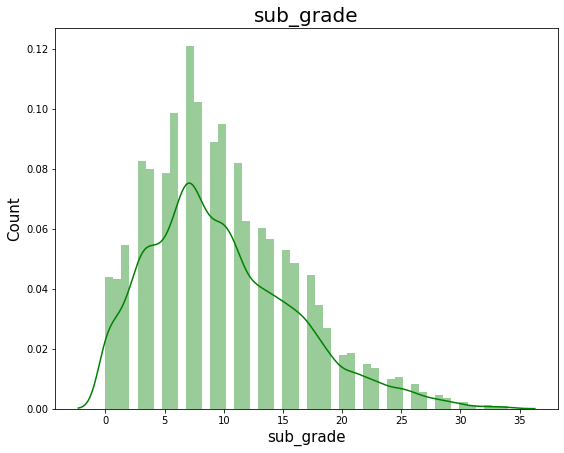

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


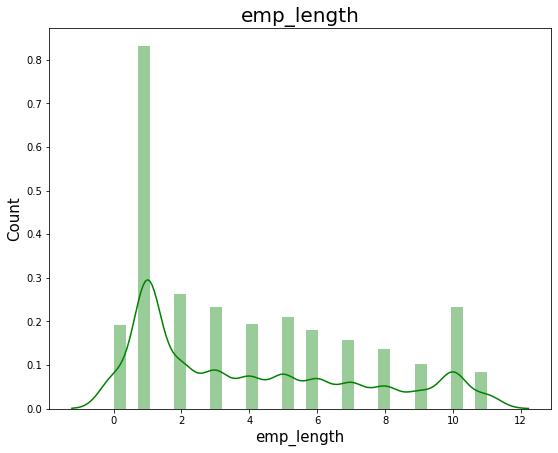

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


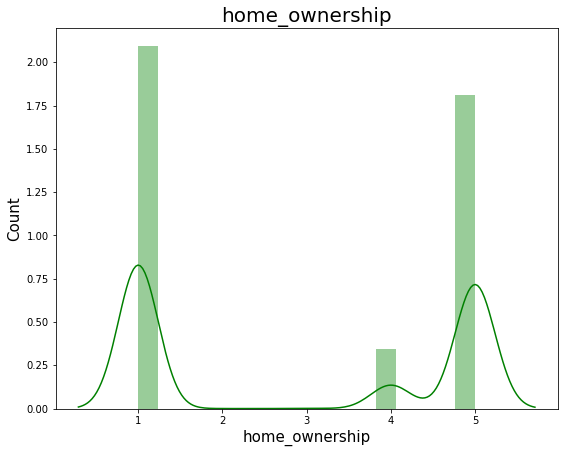

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


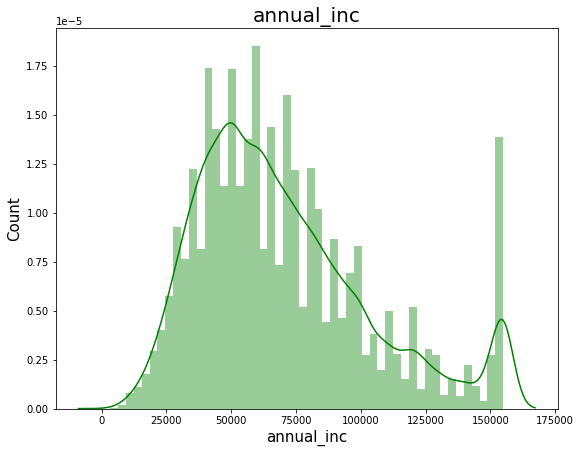

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


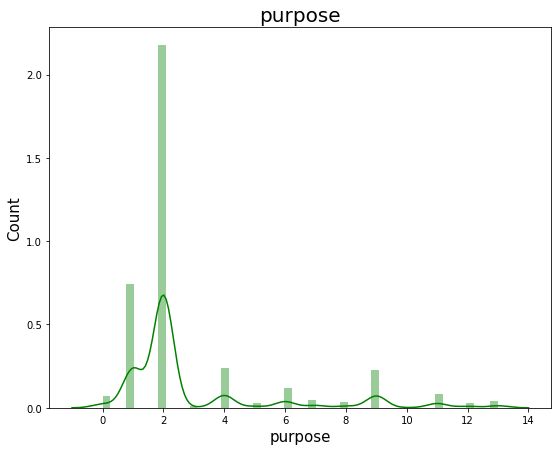

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


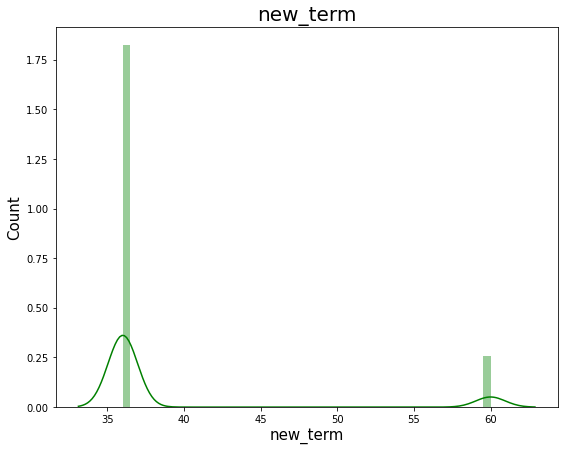

In [146]:
for i in df_cat.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_cat[i],color= 'g')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Charged off dan Doesn't meet credit policy. Status : charged off

In [144]:
# Kita coba menganalisis data orang dengan status pinjaman charged off dan Doesn't meet credit policy. Status : charged off
charged_off = hasil[(hasil['loan_status']==0) | (hasil['loan_status']==3)]
charged_off

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
3379,35000,35000,34950.000000,22.74,981.45,6,30,5,1,154882.5,1,60,0
161458,5000,5000,5000.000000,14.09,171.11,1,9,1,1,60000.0,4,36,0
141883,8000,8000,8000.000000,22.20,306.36,4,23,11,4,48000.0,9,36,0
31496,13400,13400,13400.000000,24.74,399.86,6,31,1,5,45000.0,2,60,0
170970,26500,26500,26500.000000,22.95,746.29,5,25,1,5,60000.0,2,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427719,25000,25000,25000.000000,15.31,870.44,2,13,1,1,80000.0,2,36,0
247793,10750,10750,10750.000000,11.71,355.57,1,7,6,5,28600.0,1,36,0
73319,20000,20000,2125.003567,16.15,704.63,5,27,1,1,67000.0,2,36,3
138389,20000,20000,19950.000000,13.05,674.37,1,9,1,1,141500.0,2,36,0


In [145]:
df_charged_off = charged_off[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


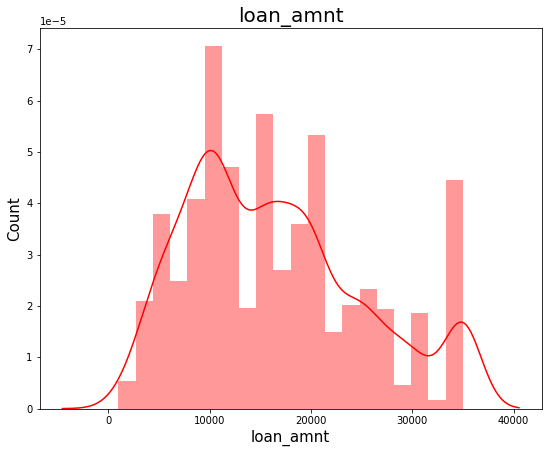

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


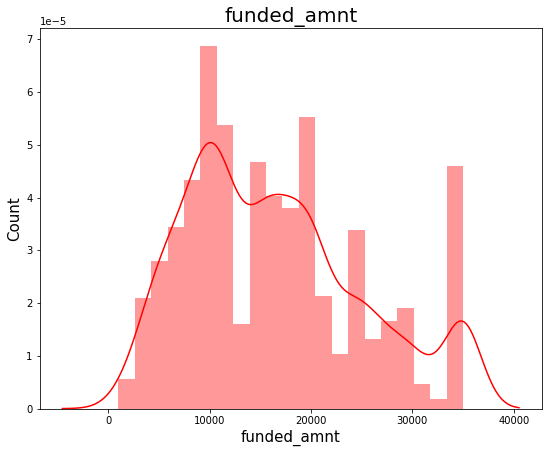

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


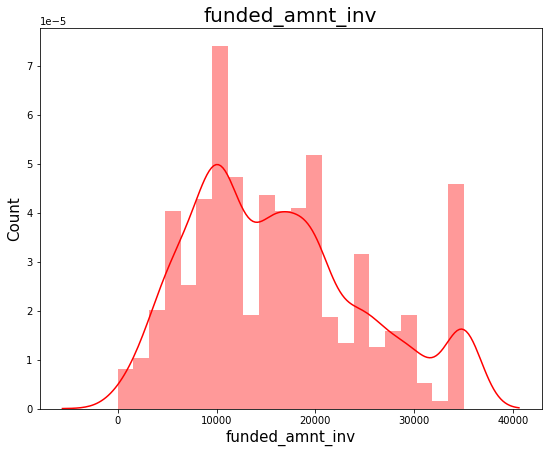

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


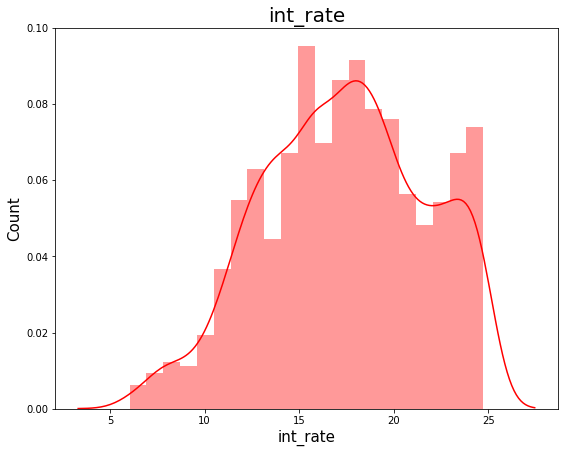

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


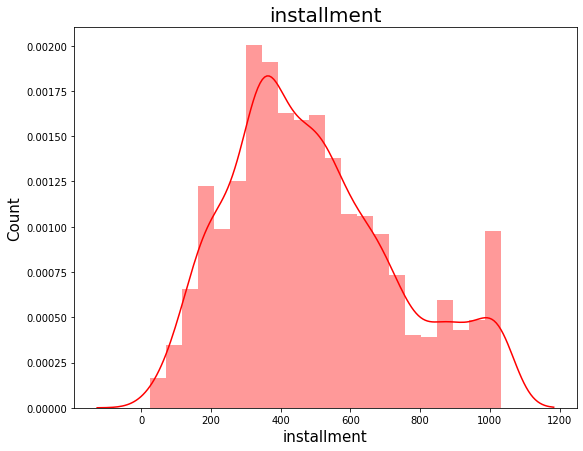

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


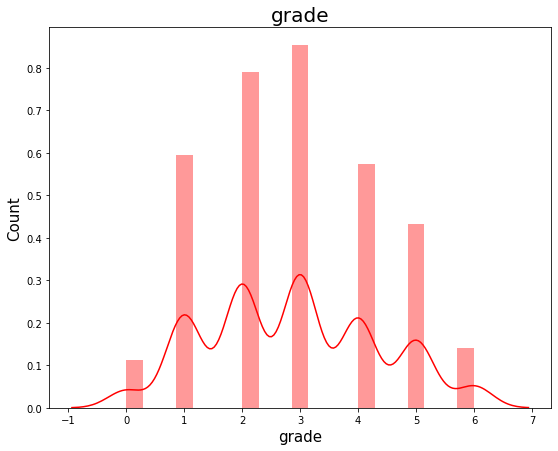

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


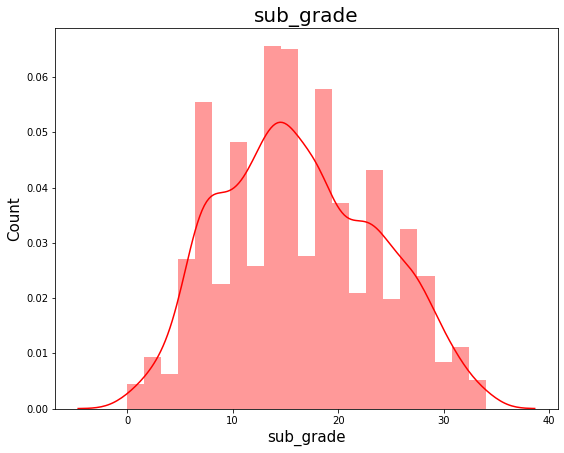

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


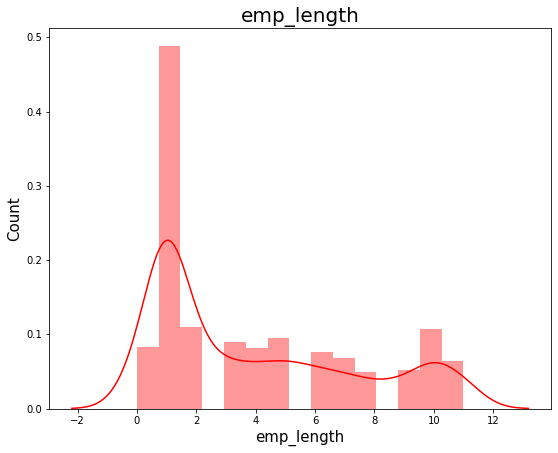

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


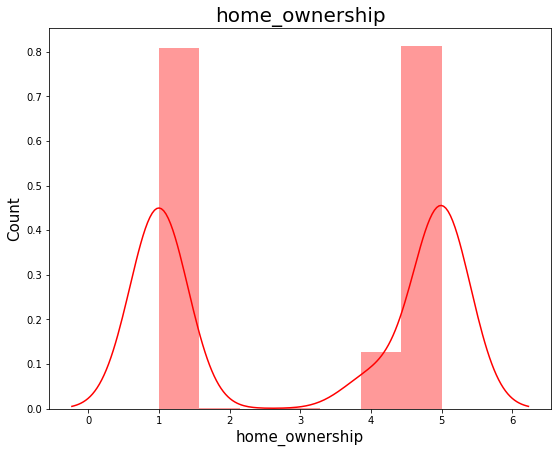

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


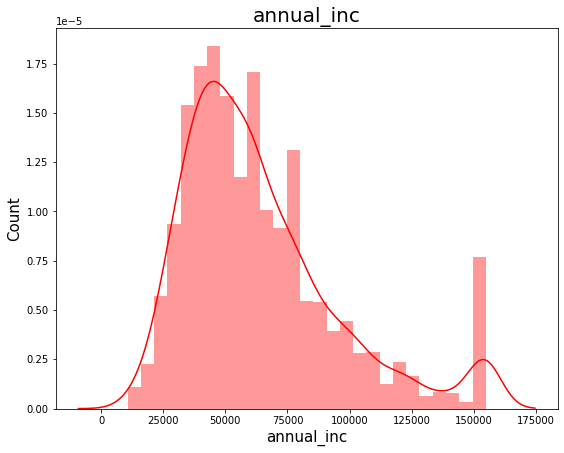

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


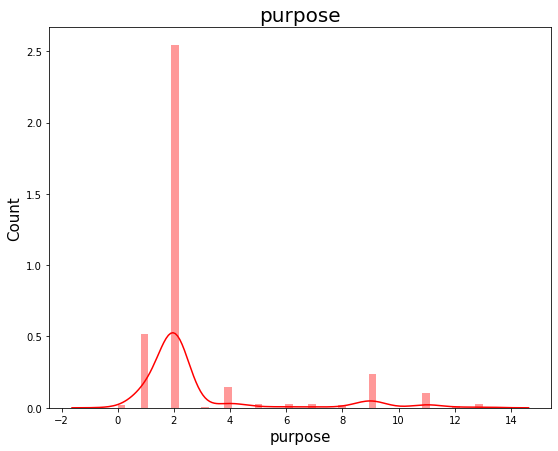

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


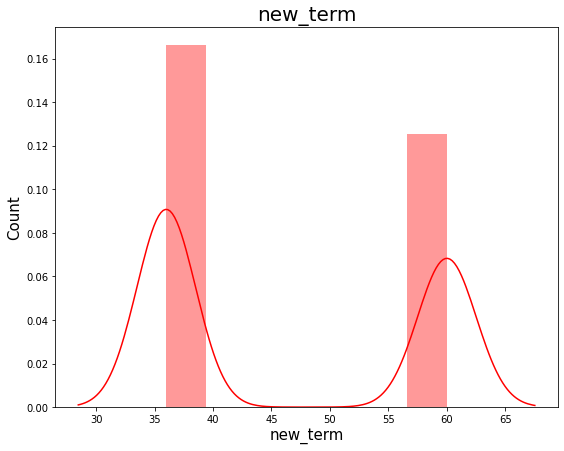

In [147]:
for i in df_charged_off.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_charged_off[i],color= 'r')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Current

In [152]:
# Kita coba menganalisis data orang dengan status pinjaman current
current = hasil[(hasil['loan_status']==1)]
current

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
24026,35000,35000,35000.0,7.49,1031.415,0,3,10,5,125000.0,1,36,1
343741,12000,12000,12000.0,12.49,401.390,1,9,2,5,52000.0,2,36,1
91745,4300,4300,4300.0,22.40,165.120,4,22,2,1,35500.0,2,36,1
58394,5000,5000,5000.0,7.14,154.710,0,2,0,5,47000.0,2,36,1
188676,6000,6000,6000.0,19.72,158.030,3,19,3,1,24710.0,2,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24303,35000,35000,35000.0,14.99,1031.415,2,14,1,1,120000.0,2,36,1
338443,7800,7800,7800.0,10.99,255.330,1,7,5,5,101000.0,1,36,1
377340,15600,15600,15600.0,13.98,362.830,2,12,2,5,68000.0,1,60,1
60519,15000,15000,15000.0,13.98,512.520,2,12,9,1,51992.0,9,36,1


In [172]:
df_current = current[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


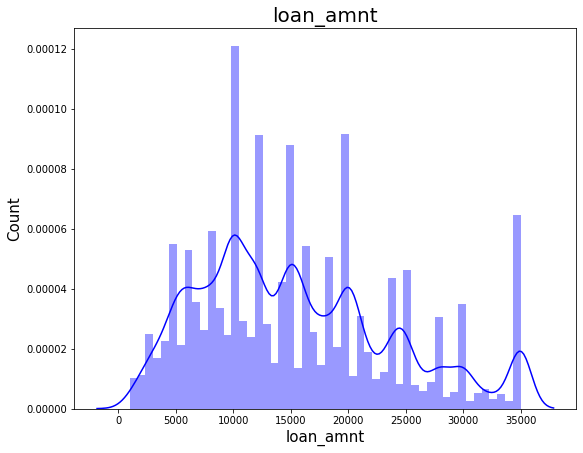

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


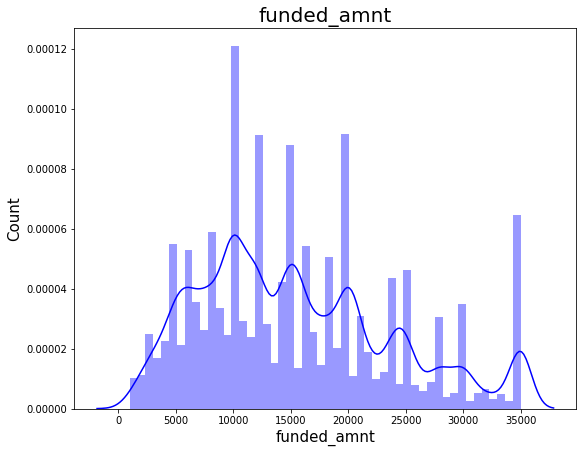

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


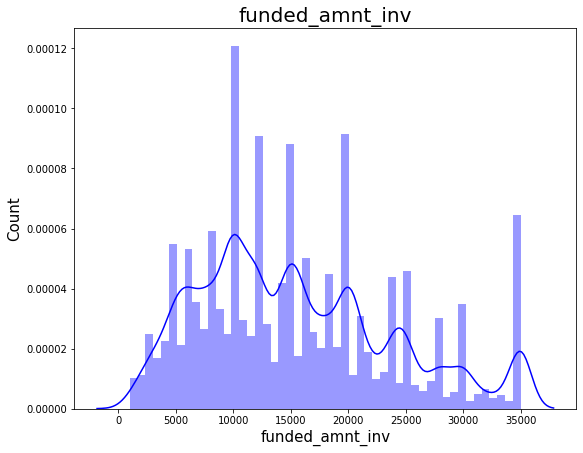

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


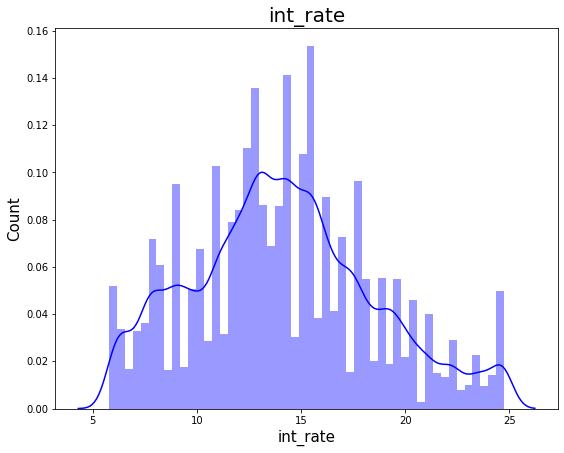

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


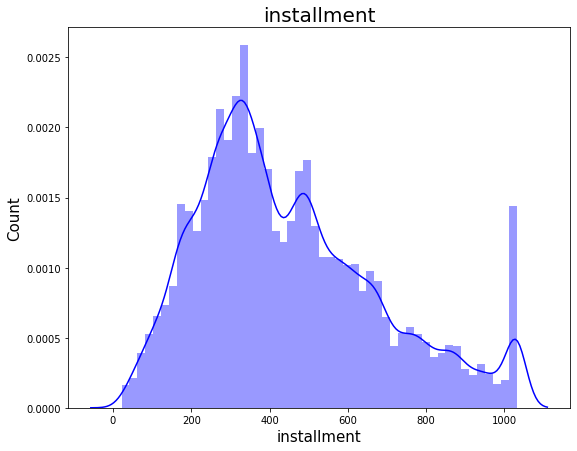

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


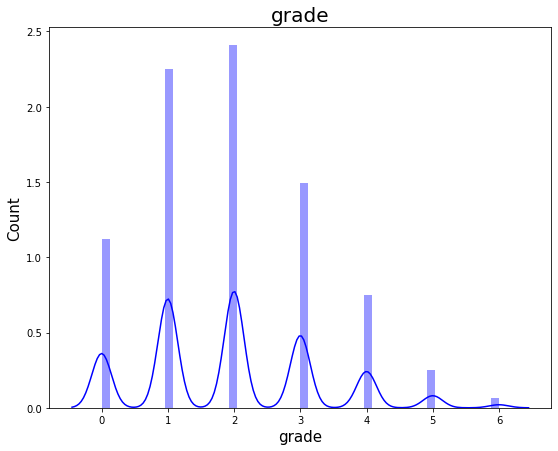

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


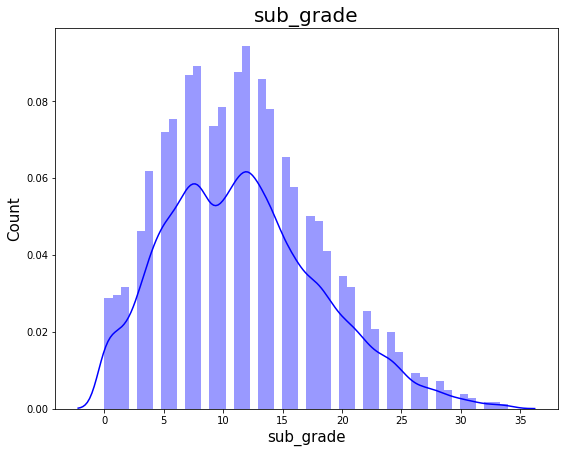

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


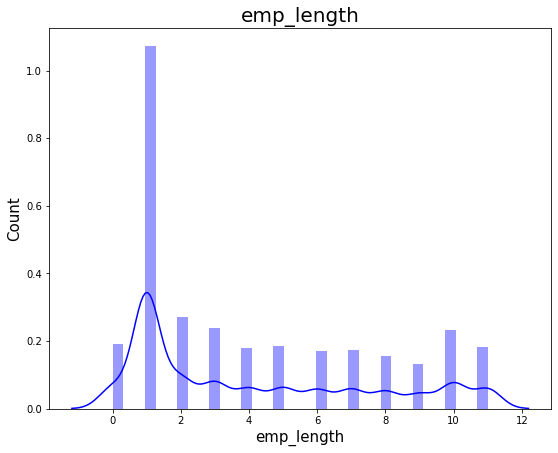

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


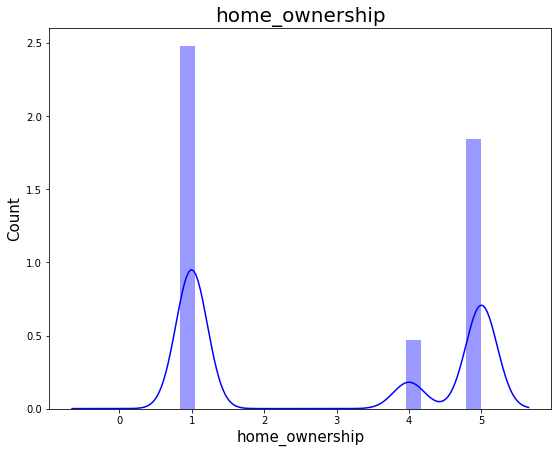

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


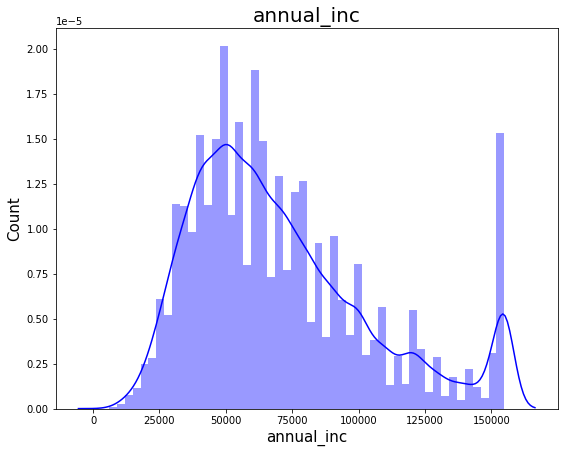

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


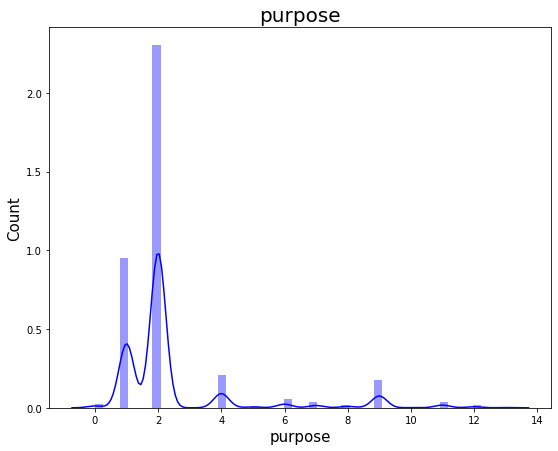

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


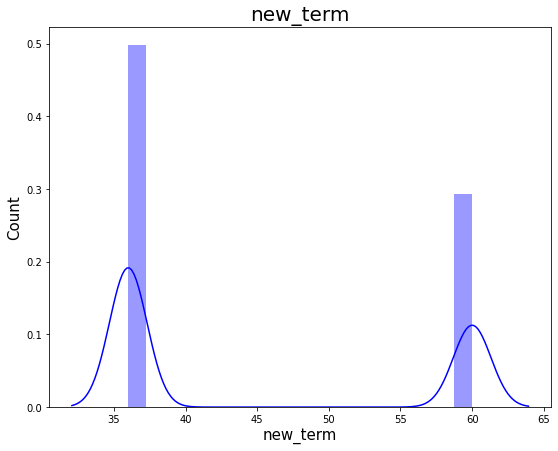

In [173]:
for i in df_current.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_current[i],color= 'b')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Default

In [174]:
# Kita coba menganalisis data orang dengan status pinjaman default
default = hasil[(hasil['loan_status']==2)]
default

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
154536,9925,9925,9925.0,11.14,325.60,1,6,9,5,29586.0,2,36,2
98999,14000,14000,14000.0,16.20,341.95,2,13,1,5,80000.0,0,60,2
257408,8000,8000,8000.0,13.66,272.11,2,12,1,5,65000.0,2,36,2
433878,21350,21350,21350.0,21.99,589.55,4,23,0,1,51000.0,2,60,2
115107,5000,5000,5000.0,11.99,166.05,1,7,3,5,31100.0,2,36,2
254118,28000,28000,28000.0,14.31,656.02,2,13,1,1,110000.0,2,60,2
14878,20000,20000,20000.0,11.67,661.14,1,8,10,1,154882.5,2,36,2
409029,5000,5000,5000.0,11.99,166.05,1,7,2,5,32000.0,2,36,2
270637,12000,12000,12000.0,15.59,289.21,3,15,0,5,50000.0,11,60,2
447213,25000,25000,25000.0,16.99,621.18,3,15,1,1,76000.0,2,60,2


In [175]:
df_default = default[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


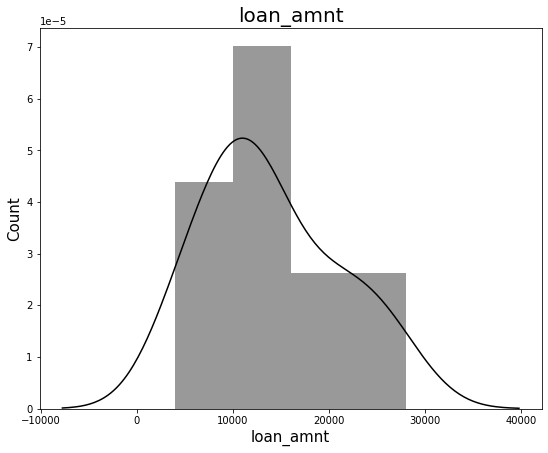

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


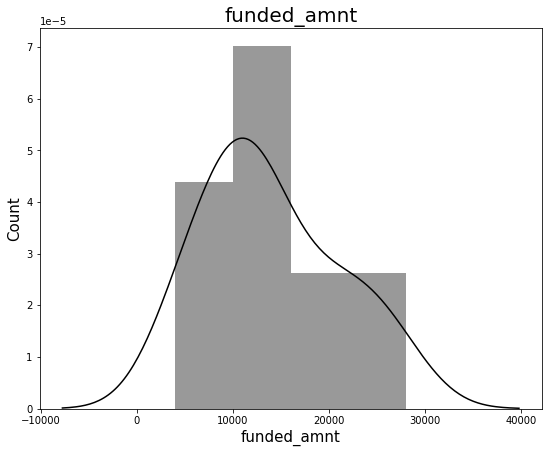

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


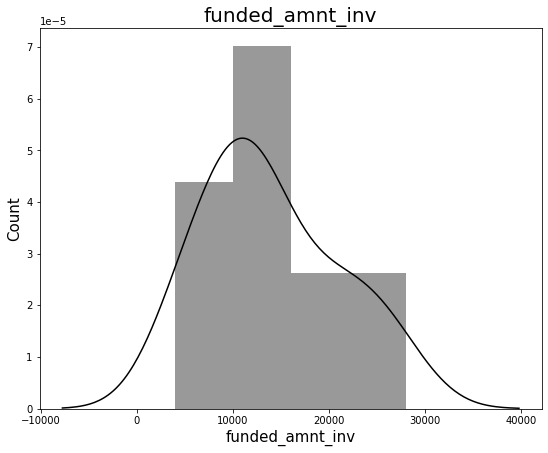

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


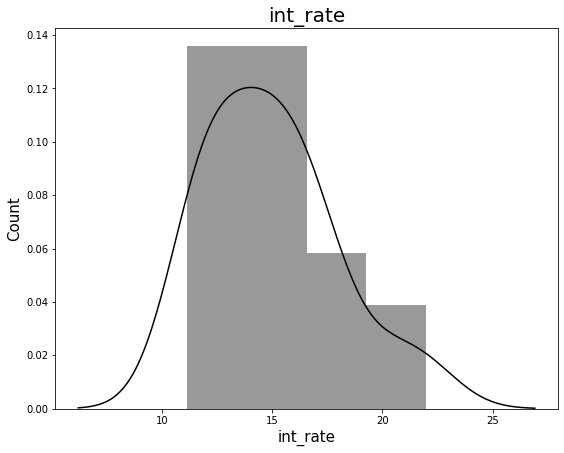

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


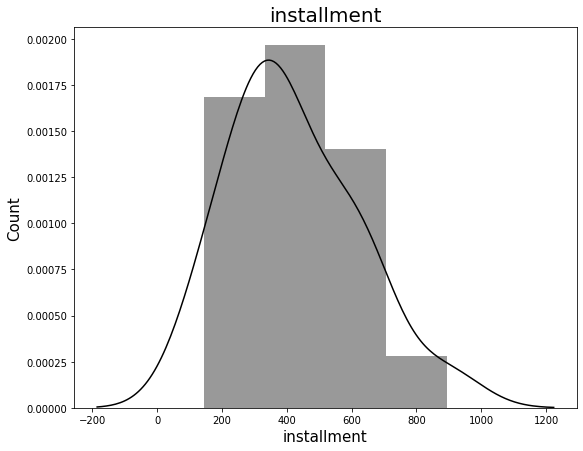

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


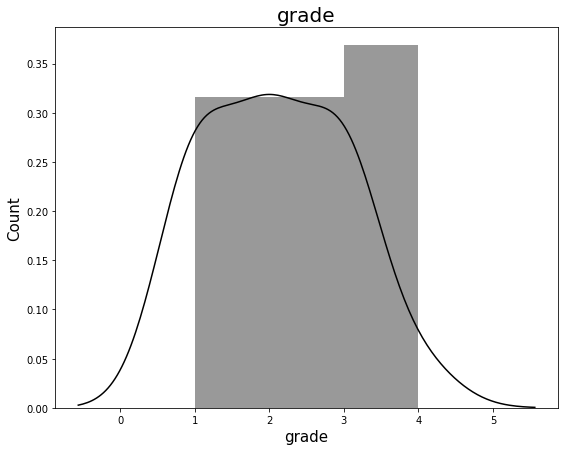

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


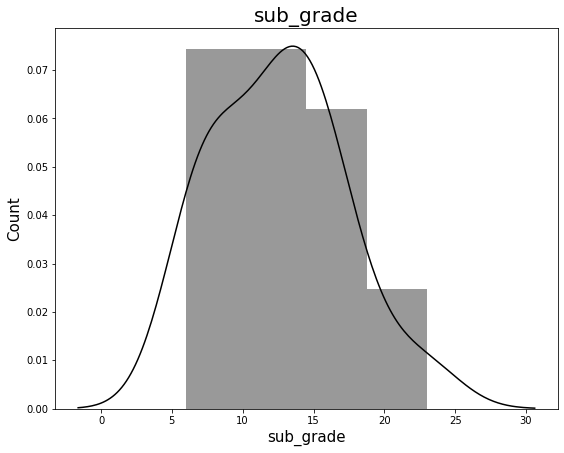

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


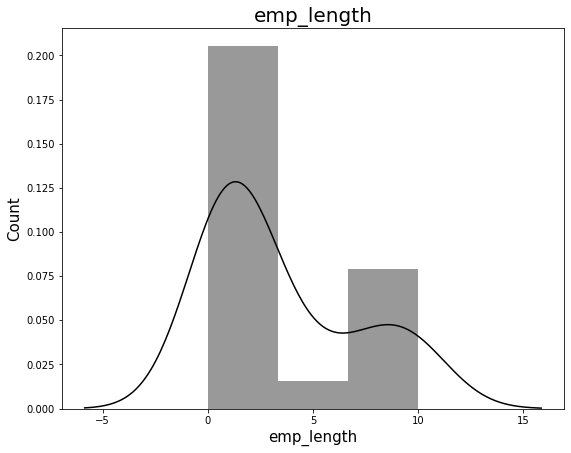

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


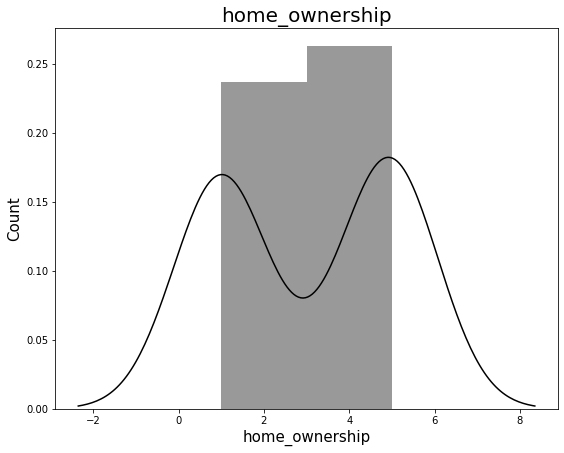

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


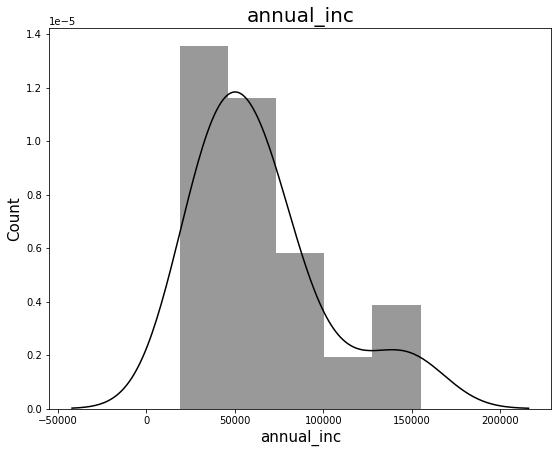

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


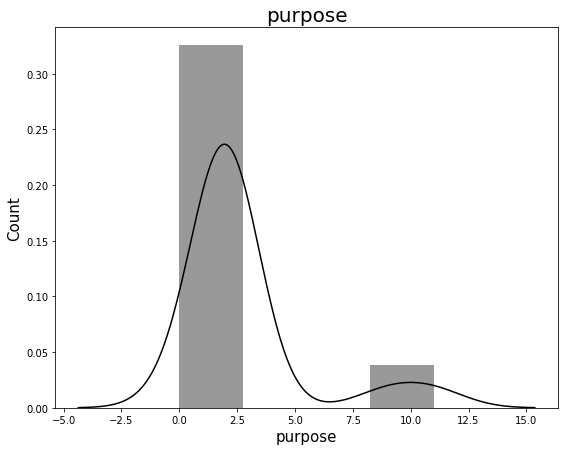

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


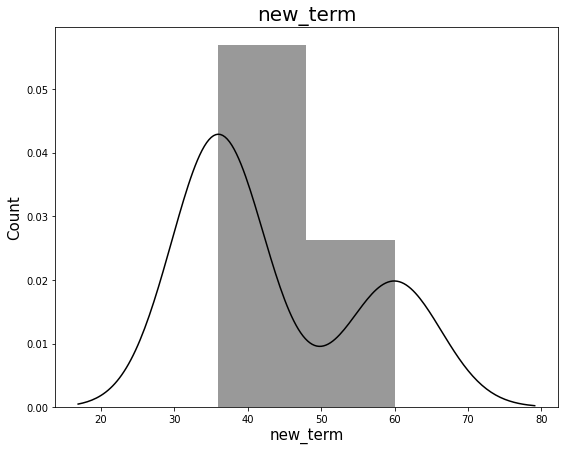

In [176]:
for i in df_default.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_default[i],color= 'black')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# In grace period

In [177]:
# Kita coba menganalisis data orang dengan status pinjaman In grace period
in_grace_period = hasil[(hasil['loan_status']==6)]
in_grace_period

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
106971,3000,3000,3000.0,11.99,99.630,1,7,2,5,45000.0,2,36,6
55657,20000,20000,19825.0,19.29,522.010,5,29,8,5,72396.0,2,60,6
456711,24000,24000,24000.0,7.62,747.880,0,2,8,1,93000.0,2,36,6
402938,18000,18000,18000.0,12.99,409.470,1,9,4,1,105000.0,2,60,6
174085,10000,10000,10000.0,10.16,323.430,1,5,1,5,58000.0,2,36,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388739,15000,15000,15000.0,7.69,467.910,0,3,6,1,55000.0,1,36,6
107800,9250,9250,9250.0,16.20,326.120,2,13,3,5,27000.0,2,36,6
20053,35000,35000,35000.0,24.74,1031.415,6,30,5,1,114300.0,2,60,6
173943,23325,23325,23325.0,12.12,776.070,1,7,5,1,52000.0,2,36,6


In [178]:
df_in_grace_period = in_grace_period[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


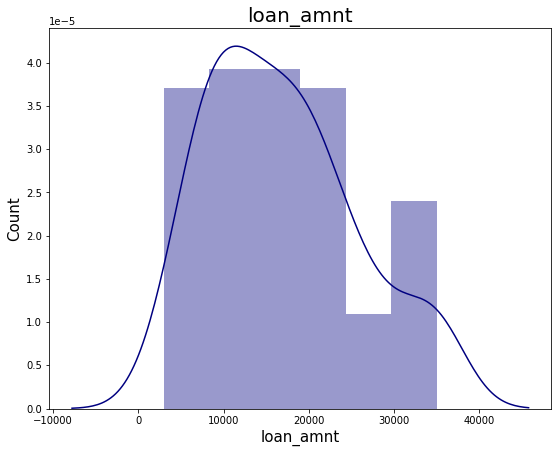

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


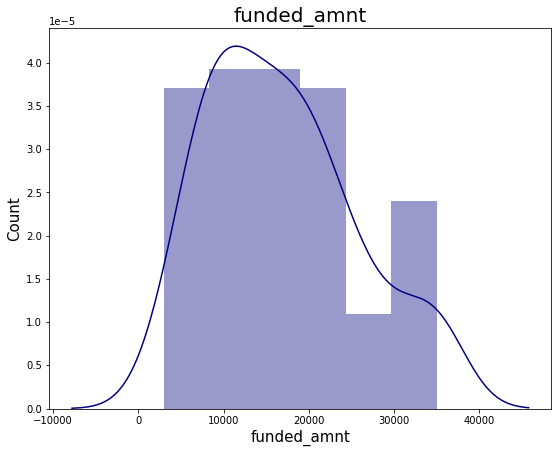

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


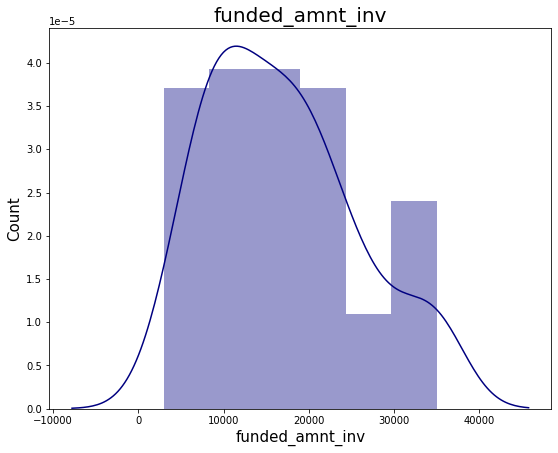

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


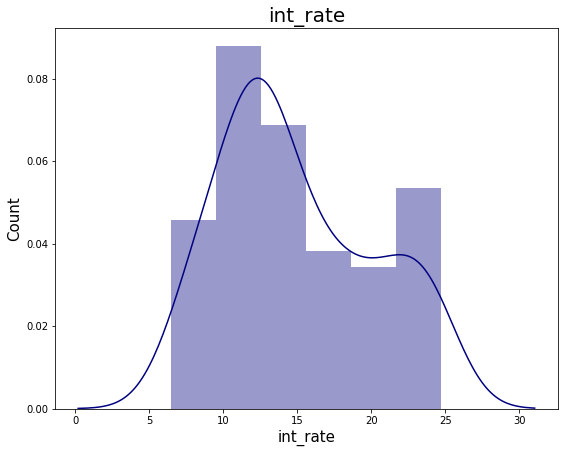

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


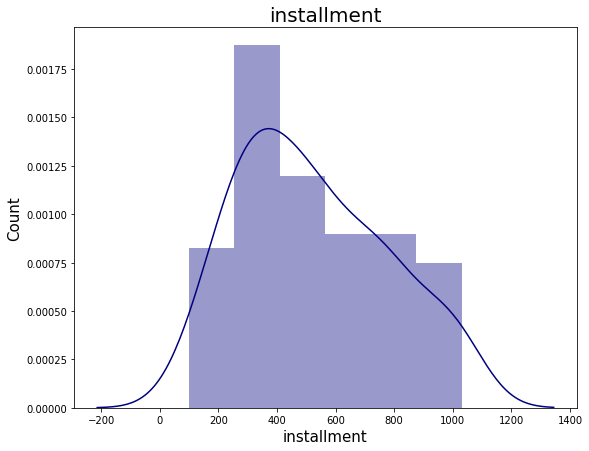

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


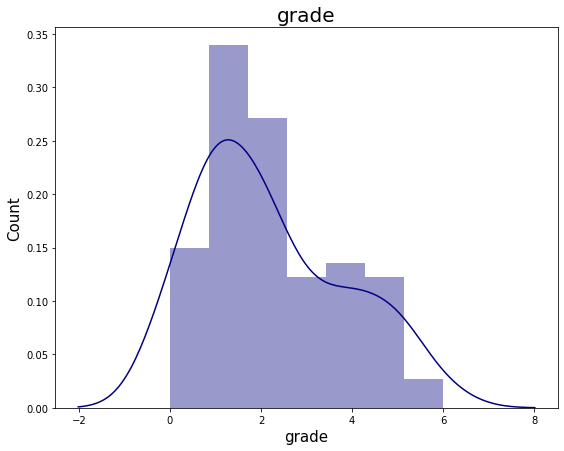

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


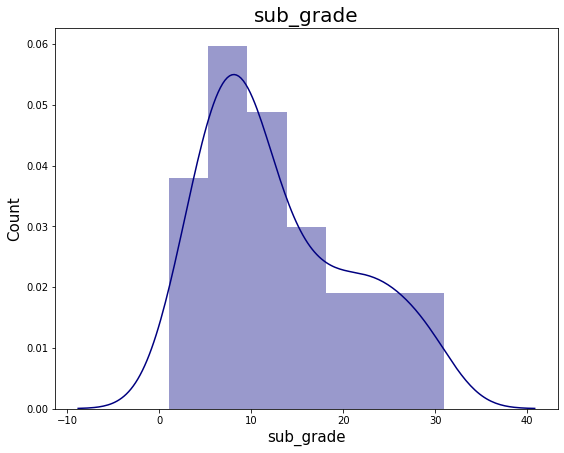

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


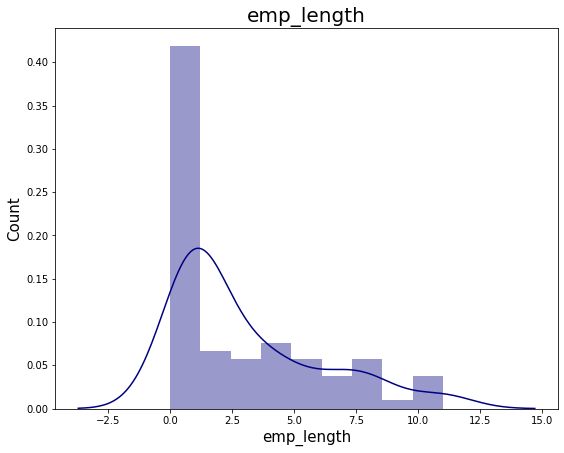

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


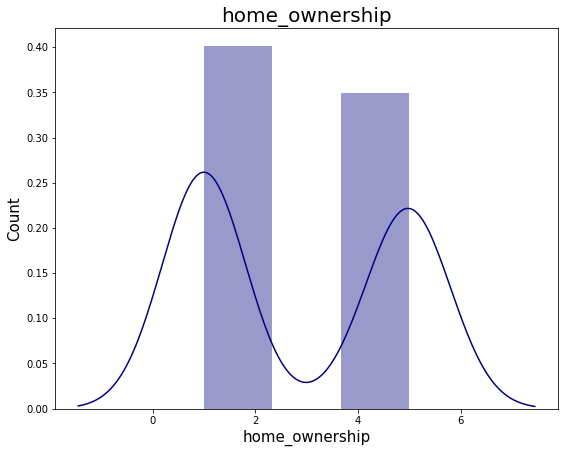

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


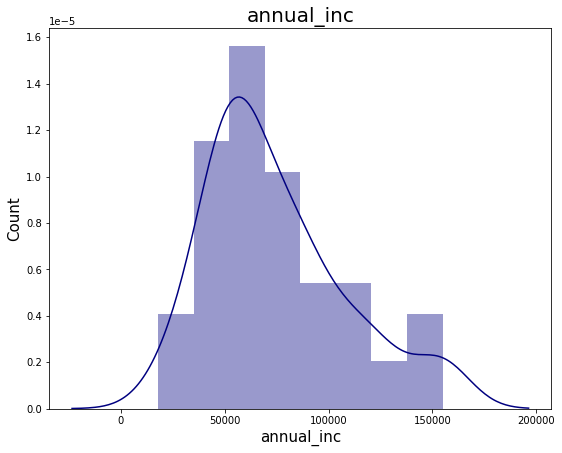

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


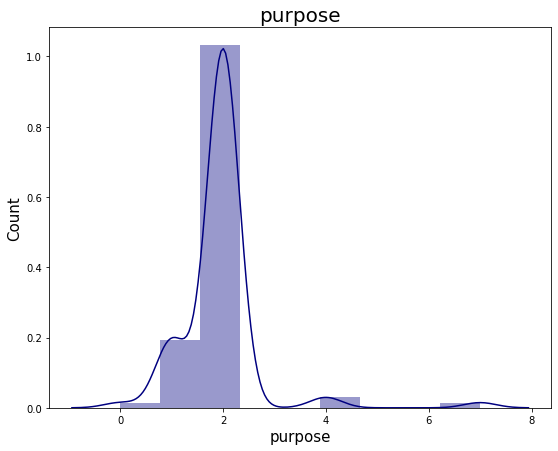

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


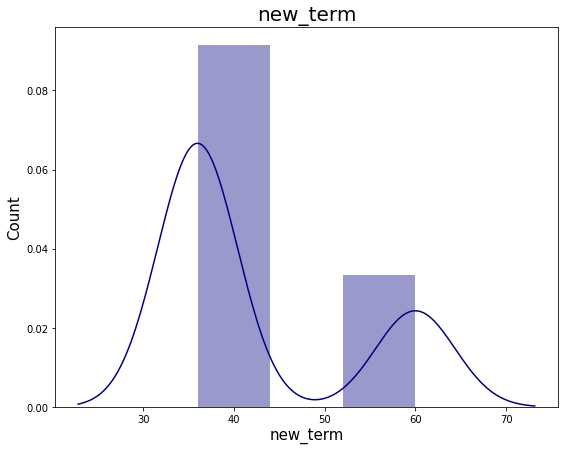

In [179]:
for i in df_in_grace_period.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_in_grace_period[i],color= 'navy')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Late 16-30 days

In [162]:
# Kita coba menganalisis data orang dengan status pinjaman Late 16-30 days
late16 = hasil[(hasil['loan_status']==7)]
late16

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
317726,20000,20000,20000.0,14.49,470.470,2,13,10,4,53000.0,2,60,7
106542,20000,20000,20000.0,13.67,680.360,1,9,8,5,45000.0,1,36,7
341159,20000,20000,20000.0,13.98,683.360,2,12,7,1,120000.0,2,36,7
294303,14800,14800,14800.0,12.99,498.600,2,10,9,1,50000.0,1,36,7
384580,6500,6500,6500.0,11.67,214.870,1,8,10,5,40000.0,2,36,7
377906,13000,13000,13000.0,20.99,351.630,4,23,0,5,50000.0,2,60,7
25804,35000,35000,35000.0,13.98,1031.415,2,12,1,1,125000.0,1,36,7
26960,35000,35000,35000.0,13.98,1031.415,2,12,1,1,115000.0,1,36,7
304065,8000,8000,8000.0,10.99,261.880,1,7,1,1,96000.0,4,36,7
393202,7500,7500,7500.0,10.15,242.540,1,6,1,1,51000.0,2,36,7


In [164]:
df_late16 = late16[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


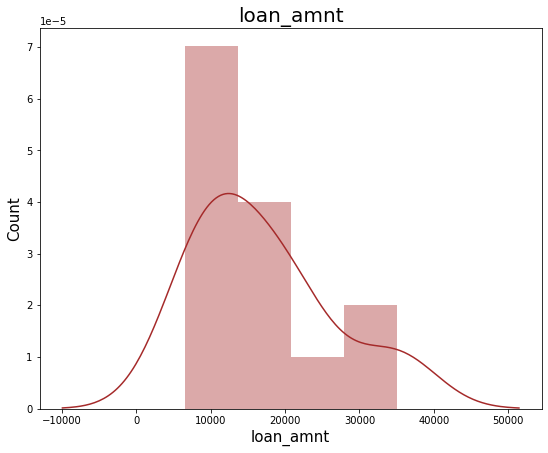

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


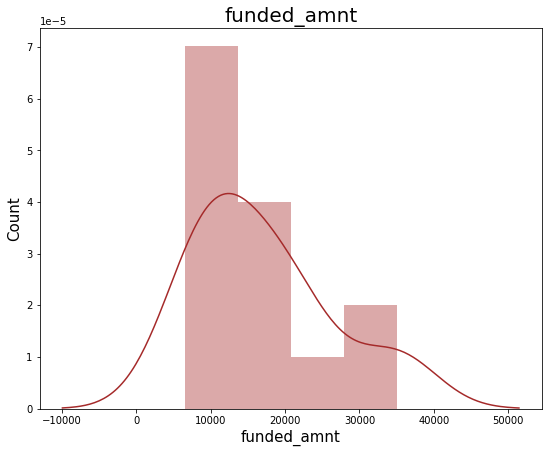

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


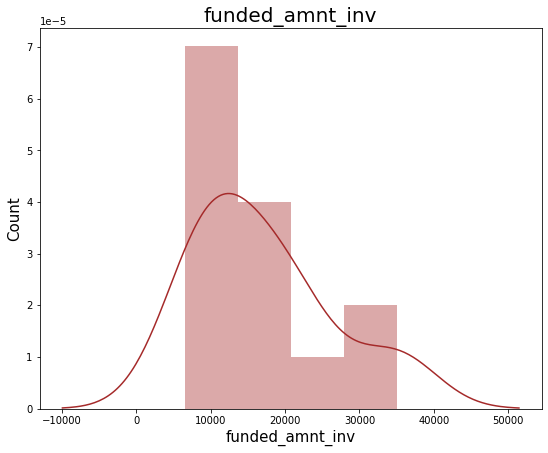

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


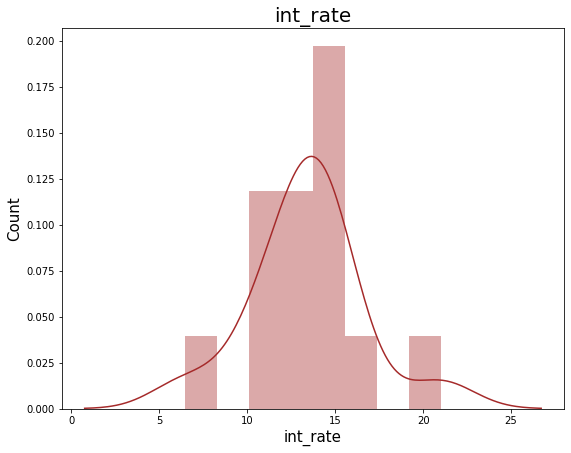

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


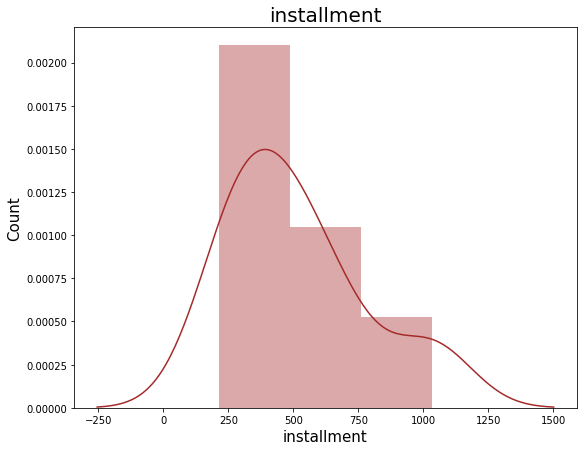

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


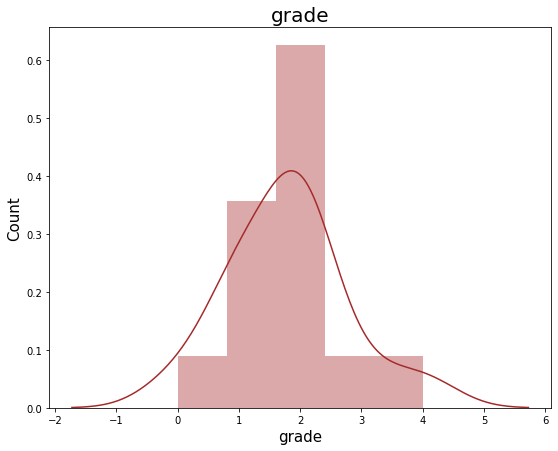

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


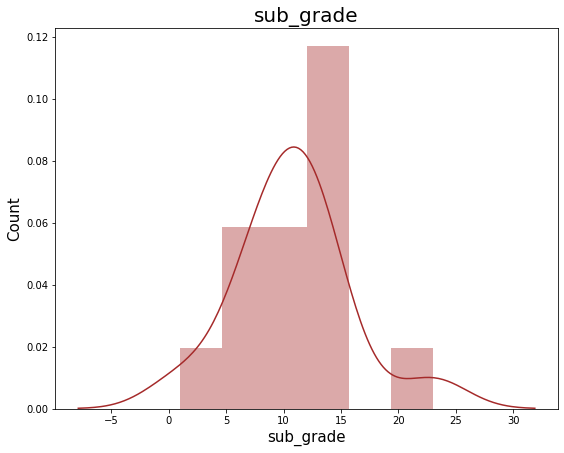

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


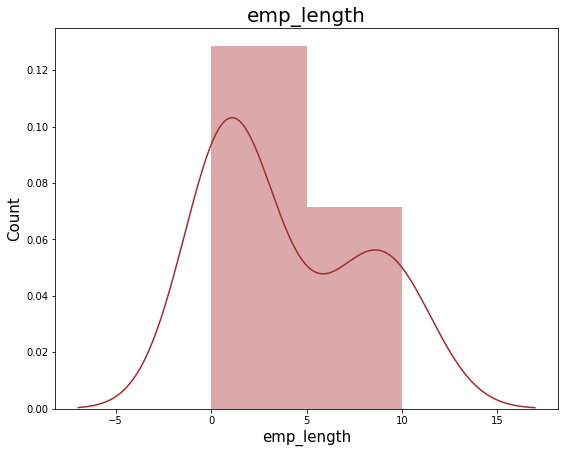

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


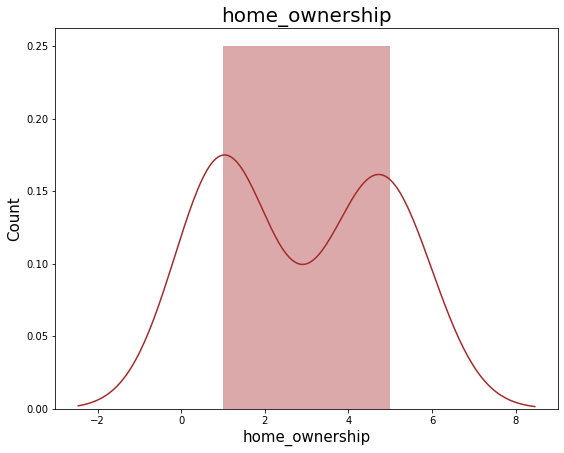

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


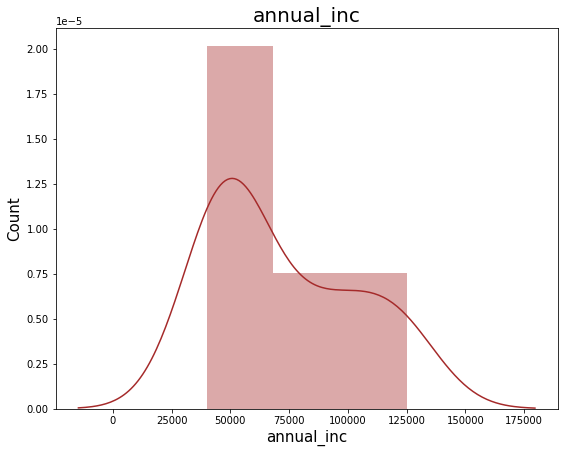

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


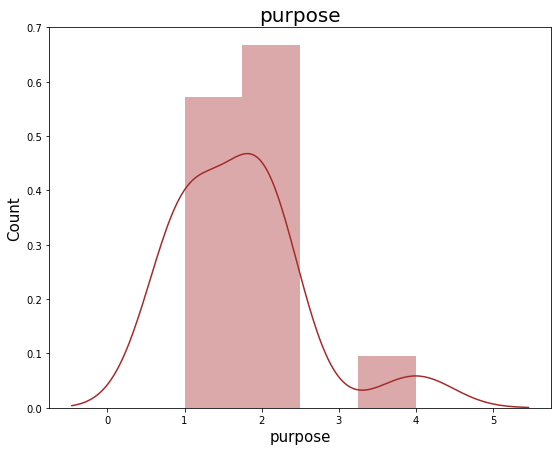

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


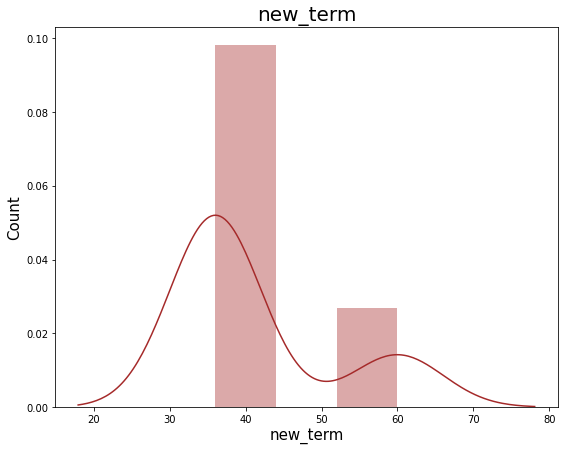

In [166]:
for i in df_late16.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_late16[i],color= 'brown')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

# Late 31-120 days

In [167]:
# Kita coba menganalisis data orang dengan status pinjaman Late 31-120 days
late31 = hasil[(hasil['loan_status']==8)]
late31

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,new_term,loan_status
310803,20225,20225,20225.0,15.61,487.66,3,15,1,1,46000.0,1,60,8
290425,4325,4325,4325.0,18.24,156.89,3,19,3,5,32000.0,2,36,8
133482,10000,10000,10000.0,11.55,330.00,1,7,1,1,65000.0,2,36,8
215677,12000,12000,12000.0,15.31,417.81,2,11,10,5,55000.0,2,36,8
464905,12000,12000,12000.0,14.98,415.87,2,12,3,1,80000.0,2,36,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322102,5000,5000,5000.0,13.98,170.84,2,12,1,1,65678.0,2,36,8
79560,5000,5000,5000.0,16.24,176.38,2,14,1,1,28000.0,4,36,8
255844,35000,35000,35000.0,15.59,843.53,3,15,1,1,81000.0,2,60,8
185741,30000,30000,30000.0,15.31,718.59,2,11,1,1,112000.0,2,60,8


In [168]:
df_late31 = late31[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','purpose','new_term']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


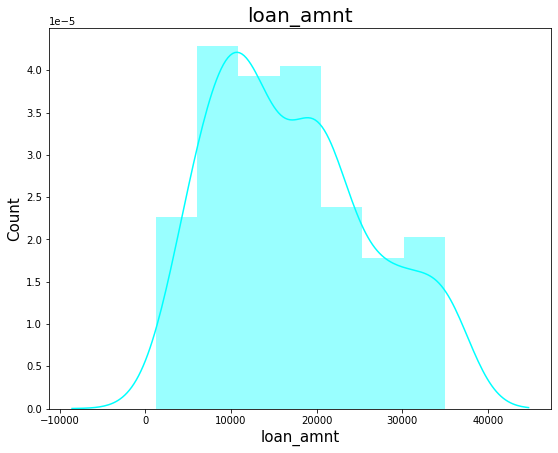

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


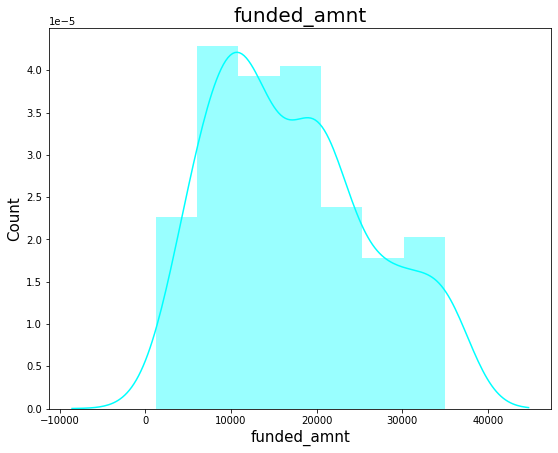

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


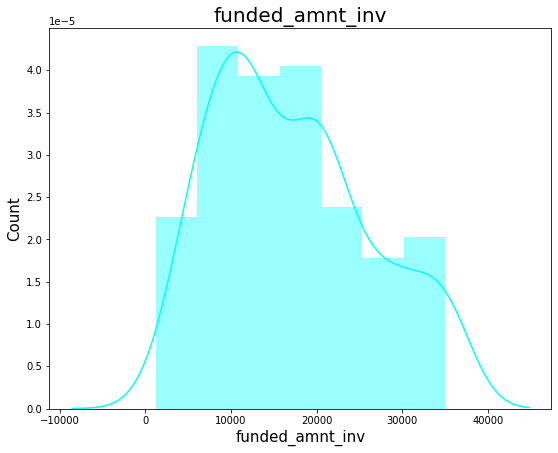

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


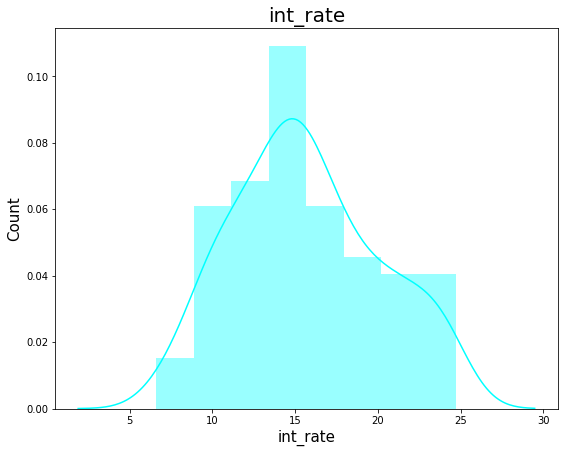

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


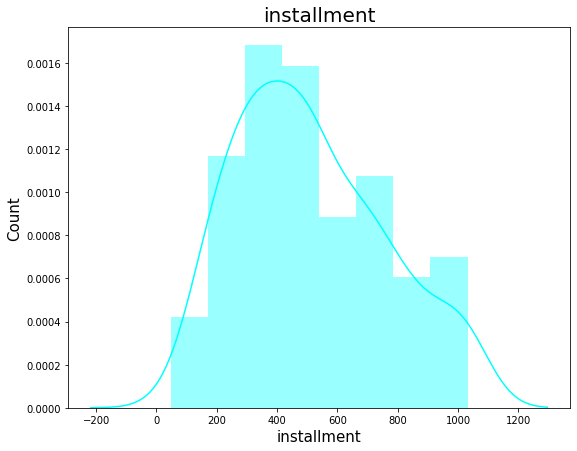

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


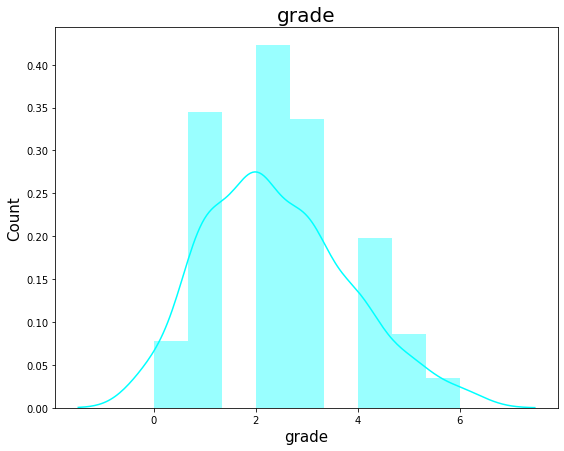

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


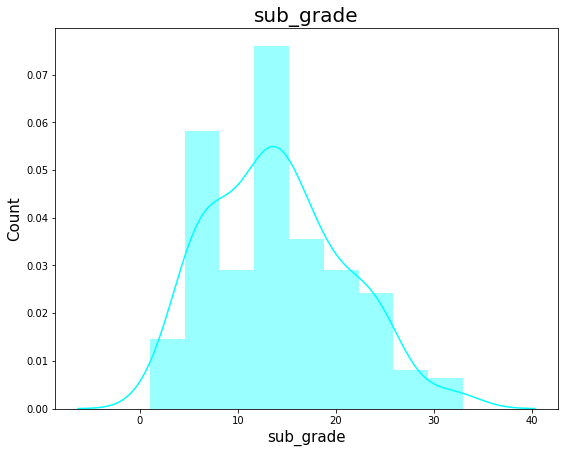

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


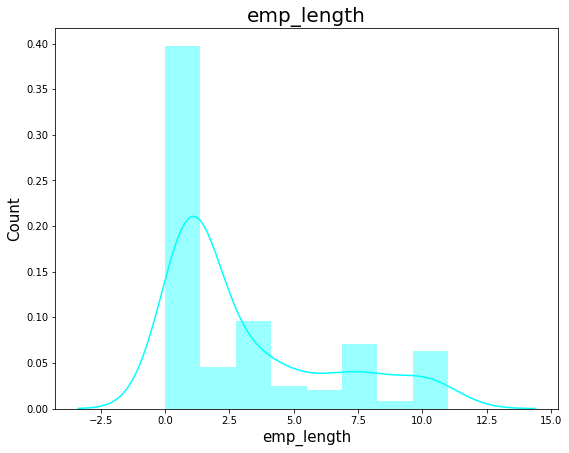

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


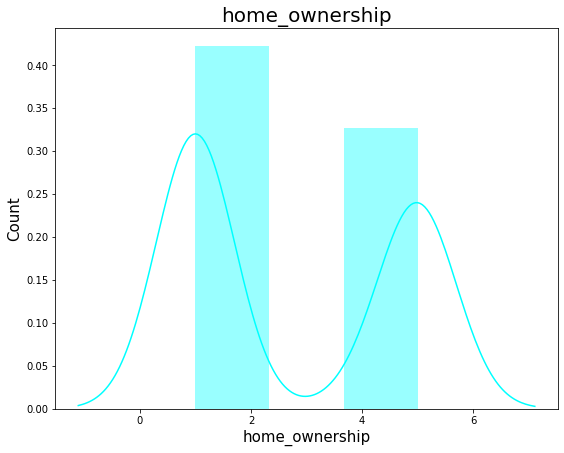

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


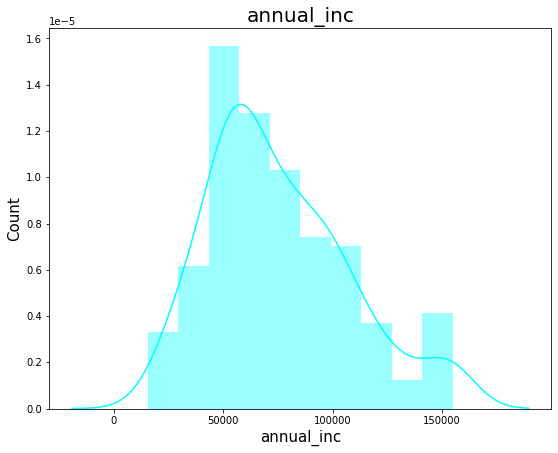

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


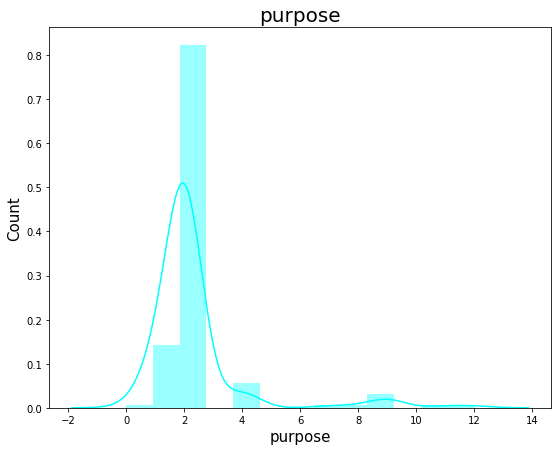

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


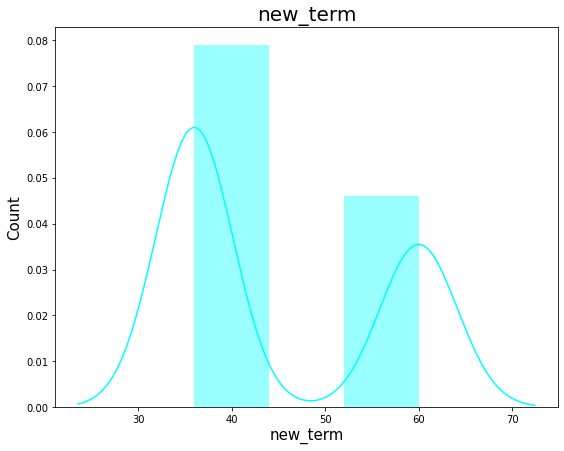

In [171]:
for i in df_late31.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(df_late31[i],color= 'cyan')
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()